In [278]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

import scipy.stats as stats

from scipy.stats import zscore

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

import math

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import scale
from sklearn import metrics,model_selection

In [279]:
df_cz = pd.read_csv("cubic_zirconia.csv",index_col=0)

In [16]:
df_cz.head(5)

carat        cut color clarity  depth  table     x     y     z  price
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [24]:
df_cz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [21]:
df_cz.describe(include='all')

carat    cut  color clarity         depth         table  \
count   26967.000000  26967  26967   26967  26270.000000  26967.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  10816   5661    6571           NaN           NaN   
mean        0.798375    NaN    NaN     NaN     61.745147     57.456080   
std         0.477745    NaN    NaN     NaN      1.412860      2.232068   
min         0.200000    NaN    NaN     NaN     50.800000     49.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.050000    NaN    NaN     NaN     62.500000     59.000000   
max         4.500000    NaN    NaN     NaN     73.600000     79.000000   

                   x             y             z         price  
count   26967.000000  26967.000000  26967.000000  26967.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean        5.729854      5.733569      3.538057   3939.518115  
std         1.128516      1.166058      0.720624   4024.864666  
min         0.000000      0.000000      0.000000    326.000000  
25%         4.710000      4.710000      2.900000    945.000000  
50%         5.690000      5.710000      3.520000   2375.000000  
75%         6.550000      6.540000      4.040000   5360.000000  
max        10.230000     58.900000     31.800000  18818.000000

In [41]:
df_cz.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [280]:
df_cz_depth_median=df_cz["depth"].median()
df_cz_depth_median
df_cz["depth"]=df_cz["depth"].fillna(df_cz_depth_median)

In [26]:
df_cz.eq(0).any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x           True
y           True
z           True
price      False
dtype: bool

In [164]:
df_cz[(df_cz['x']==0)|(df_cz['y']==0)|(df_cz['z']==0)].count()

carat      9
cut        9
color      9
clarity    9
depth      9
table      9
x          9
y          9
z          9
price      9
dtype: int64

In [5]:
df_cz[(df_cz['x']==0)|(df_cz['y']==0)|(df_cz['z']==0)]
# print((df_cz['x']==0))

carat      cut color clarity  depth  table     x     y    z  price
5822    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6035    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
6216    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
10828   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12499   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
12690   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
17507   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
18195   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
23759   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383

In [28]:
df_cz.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [30]:
df_cz.shape

(26967, 10)

In [43]:
for column in df_cz.columns:
    if df_cz[column].dtype == 'object':
        print(column.upper(),': ',df_cz[column].nunique())
        print(df_cz[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [281]:
feature_encoding = {"cut":     {"Fair": 1, "Good": 2,"Very Good":3,"Premium":4,"Ideal":5},
                "color": {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1},
                   "clarity": {"FL":11, "IF":10, "VVS1":9, "VVS2":8, "VS1":7, "VS2":6, "SI1":5, "SI2":4, "I1":3, "I2":2, "I3":1}}

df_cz_enc=df_cz.replace(feature_encoding)
df_cz_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [73]:
df_cz_enc.head(10)

carat  cut  color  clarity  depth  table     x     y     z  price
1    0.30    5      6        5   62.1   58.0  4.27  4.29  2.66    499
2    0.33    4      4       10   60.8   58.0  4.42  4.46  2.70    984
3    0.90    3      6        8   62.2   60.0  6.04  6.12  3.78   6289
4    0.42    5      5        7   61.6   56.0  4.82  4.80  2.96   1082
5    0.31    5      5        9   60.4   59.0  4.35  4.43  2.65    779
6    1.02    5      7        6   61.5   56.0  6.46  6.49  3.99   9502
7    1.01    2      3        5   63.7   60.0  6.35  6.30  4.03   4836
8    0.50    4      6        5   61.5   62.0  5.09  5.06  3.12   1415
9    1.21    2      3        5   63.8   64.0  6.72  6.63  4.26   5407
10   0.35    5      5        6   60.5   57.0  4.52  4.60  2.76    706

In [282]:
df_cz_scaled=df_cz_enc.apply(zscore)
df_cz_scaled.head(5)

carat       cut    color   clarity     depth     table         x  \
1 -1.043201  0.979550  0.94147 -0.639402  0.253453  0.243689 -1.293628   
2 -0.980405  0.081246 -0.23089  2.396400 -0.678792  0.243689 -1.160708   
3  0.212721 -0.817058  0.94147  1.182079  0.325164  1.139736  0.274832   
4 -0.792017  0.979550  0.35529  0.574919 -0.105103 -0.652358 -0.806254   
5 -1.022269  0.979550  0.35529  1.789239 -0.965637  0.691712 -1.222737   

          y         z     price  
1 -1.238014 -1.218491 -0.854832  
2 -1.092221 -1.162983 -0.734329  
3  0.331406  0.335747  0.583753  
4 -0.800635 -0.802177 -0.709979  
5 -1.117949 -1.232368 -0.785263

In [283]:
def check_normaldistrib(df_col):
    print('Mean is %f, Median is %f, Mode(s) are ' %(np.mean(df_col), np.median(df_col)),end="")
    modelist=stats.mode(df_col,axis=None)
    print("%.4f" %(modelist[0]))

def check_for_outliers(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 =  df_col.quantile(0.75)
    IQR = Q3 - Q1
    return any((df_col < (Q1 - 1.5 * IQR)) | (df_col > (Q3 + 1.5 * IQR)))

In [284]:
def univariate_analysis(df_input):
    ctr=0
    for i in df_input.columns:
        ctr=ctr+1;
        print('\n %d. Univariate analysis for %s \n' % (ctr, i))
        w, p_value=stats.shapiro(df_input[i])
        check_normaldistrib(df_input[i])
        if check_for_outliers(df_input[i]):
            print('Column %s has outliers' %(i))
        else:
            print('Column %s does not have outliers' %(i))
        plt.figure(figsize=(15,3))
        plt.subplot(1,3,1)
        sns.boxplot(df_input[i])
        plt.subplot(1,3,2)
        sns.distplot(df_input[i],hist=False)
        plt.subplot(1,3,3)
        plt.hist(df_input[i])
        plt.show()
        if p_value > 0.05:
            print('Column %s is normally distributed' %(i))
        else:
            print ('Column %s is not normally distributed' %(i))


 1. Univariate analysis for carat 

Mean is 0.798375, Median is 0.700000, Mode(s) are 0.3000
Column carat has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


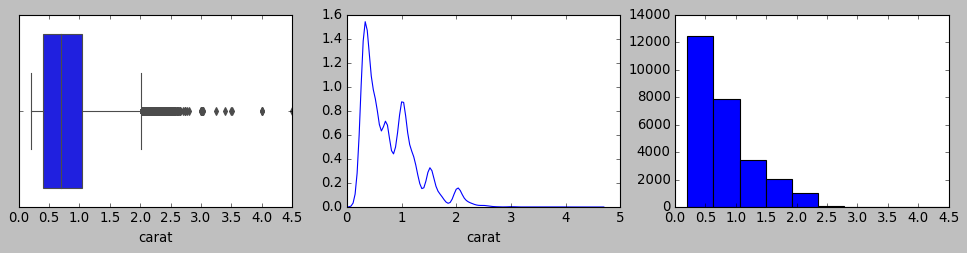

Column carat is not normally distributed

 2. Univariate analysis for depth 

Mean is 61.746564, Median is 61.800000, Mode(s) are 61.8000
Column depth has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


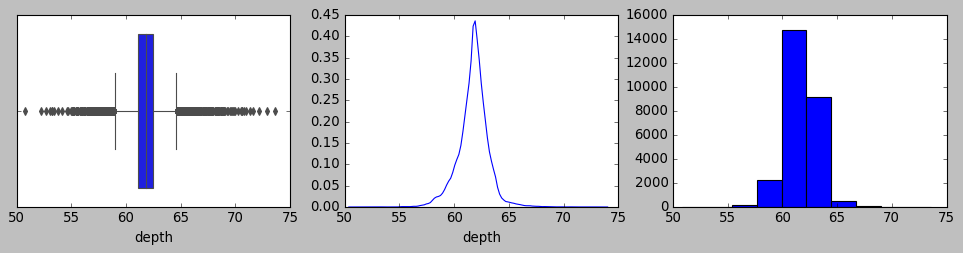

Column depth is not normally distributed

 3. Univariate analysis for table 

Mean is 57.456080, Median is 57.000000, Mode(s) are 56.0000
Column table has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


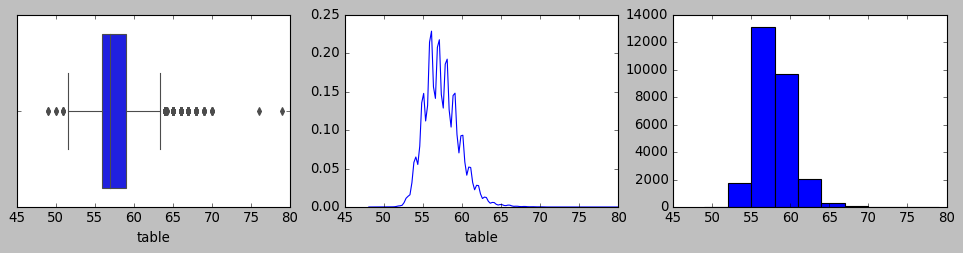

Column table is not normally distributed

 4. Univariate analysis for x 

Mean is 5.729854, Median is 5.690000, Mode(s) are 4.3800
Column x has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


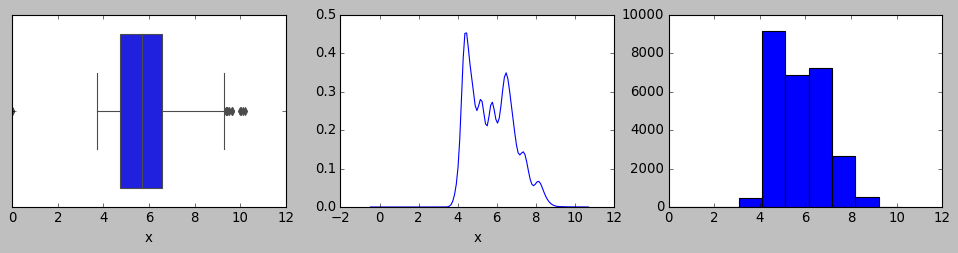

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column x is not normally distributed

 5. Univariate analysis for y 

Mean is 5.733569, Median is 5.710000, Mode(s) are 4.3500
Column y has outliers


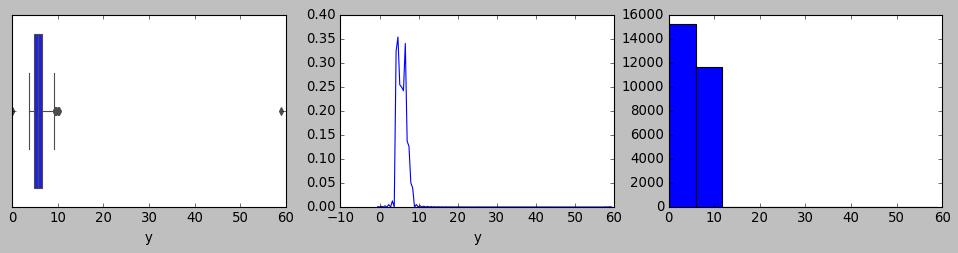

Column y is not normally distributed

 6. Univariate analysis for z 

Mean is 3.538057, Median is 3.520000, Mode(s) are 2.6900
Column z has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


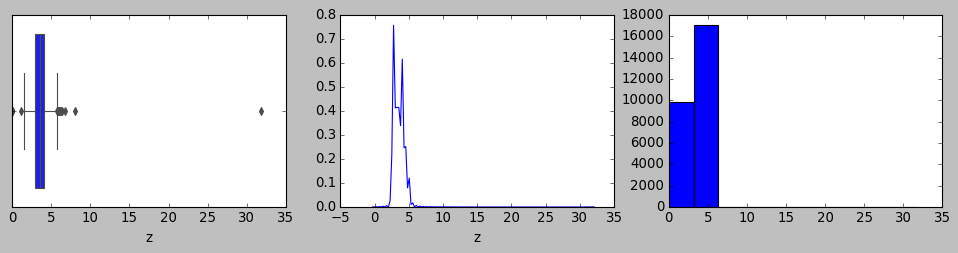

Column z is not normally distributed

 7. Univariate analysis for price 

Mean is 3939.518115, Median is 2375.000000, Mode(s) are 544.0000
Column price has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


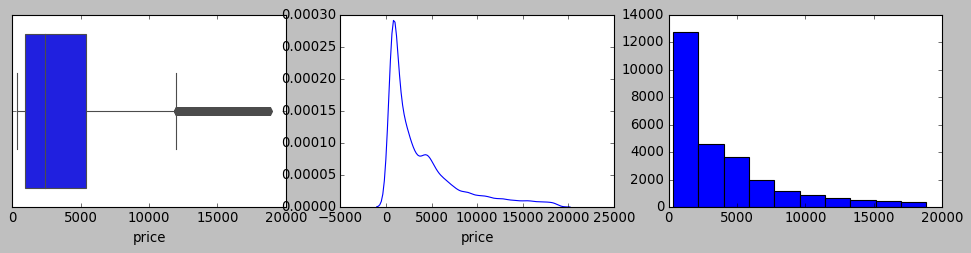

Column price is not normally distributed


In [285]:
univariate_analysis(df_cz.drop(['cut','color','clarity'],axis=1))

In [36]:
# univariate_analysis(df_cz_scaled)

In [55]:
df_cz_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [286]:
df_cz_treated = df_cz_scaled.copy()


# carat_IQR= df_cz_treated['carat'].quantile(0.75) -df_cz_treated['carat'].quantile(0.25) 
# whisker_left_carat=float(np.percentile(df_cz_treated['carat'],[25]))-(1.5*carat_IQR)
# df_cz_treated.iloc[df_cz_treated[df_cz_treated['carat']<whisker_left_carat].index,0]=whisker_left_carat
# print(whisker_left_carat)

carat_IQR= df_cz_treated['carat'].quantile(0.75) -df_cz_treated['carat'].quantile(0.25) 
whisker_right_carat=float(np.percentile(df_cz_treated['carat'],[75]))+(1.5*carat_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['carat']>whisker_right_carat].index,'carat']=whisker_right_carat
print(whisker_right_carat)

depth_IQR= df_cz_treated['depth'].quantile(0.75) -df_cz_treated['depth'].quantile(0.25)

whisker_left_depth=float(np.percentile(df_cz_treated['depth'],[25]))-(1.5*depth_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['depth']<whisker_left_depth].index,'depth']=whisker_left_depth
print(whisker_left_depth)

whisker_right_depth=float(np.percentile(df_cz_treated['depth'],[75]))+(1.5*depth_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['depth']>whisker_right_depth].index,'depth']=whisker_right_depth
print(whisker_right_depth)

table_IQR= df_cz_treated['table'].quantile(0.75) -df_cz_treated['table'].quantile(0.25)

whisker_left_table=float(np.percentile(df_cz_treated['table'],[25]))-(1.5*table_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['table']<whisker_left_table].index,'table']=whisker_left_table
print(whisker_left_table)

whisker_right_table=float(np.percentile(df_cz_treated['table'],[75]))+(1.5*table_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['table']>whisker_right_table].index,'table']=whisker_right_table
print(whisker_right_table)

x_IQR= df_cz_treated['x'].quantile(0.75) -df_cz_treated['x'].quantile(0.25)

whisker_left_x=float(np.percentile(df_cz_treated['x'],[25]))-(1.5*x_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['x']<whisker_left_x].index,'x']=whisker_left_x
print(whisker_left_x)

whisker_right_x=float(np.percentile(df_cz_treated['x'],[75]))+(1.5*x_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['x']>whisker_right_x].index,'x']=whisker_right_x
print(whisker_right_x)

y_IQR= df_cz_treated['y'].quantile(0.75) -df_cz_treated['y'].quantile(0.25)

whisker_left_y=float(np.percentile(df_cz_treated['y'],[25]))-(1.5*y_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['y']<whisker_left_y].index,'y']=whisker_left_table
print(whisker_left_y)

whisker_right_y=float(np.percentile(df_cz_treated['y'],[75]))+(1.5*y_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['y']>whisker_right_y].index,'y']=whisker_right_y
print(whisker_right_y)

z_IQR= df_cz_treated['z'].quantile(0.75) -df_cz_treated['z'].quantile(0.25)

whisker_left_z=float(np.percentile(df_cz_treated['z'],[25]))-(1.5*z_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['z']<whisker_left_z].index,'z']=whisker_left_z
print(whisker_left_z)

whisker_right_z=float(np.percentile(df_cz_treated['z'],[75]))+(1.5*z_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['z']>whisker_right_z].index,'z']=whisker_right_z
print(whisker_right_z)


price_IQR= df_cz_treated['price'].quantile(0.75) -df_cz_treated['price'].quantile(0.25)

whisker_left_price=float(np.percentile(df_cz_treated['price'],[25]))-(1.5*price_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['price']<whisker_left_price].index,'price']=whisker_left_price
print(whisker_left_price)

whisker_right_price=float(np.percentile(df_cz_treated['price'],[75]))+(1.5*price_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['price']>whisker_right_price].index,'price']=whisker_right_price
print(whisker_right_price)

2.5675749741502534
-1.969593752801623
2.0462324697884324
-2.6684627580685745
2.7078174401290203
-3.349462785334703
3.1724952585716313
-3.2319491836853524
3.0457305511012747
-3.2584288227190217
3.0695409910165172
-2.3894459142108544
1.9983606118389319


In [50]:
df_cz_treated.describe()

carat           cut         color       clarity         depth  \
count  26967.000000  2.696700e+04  2.696700e+04  2.696700e+04  26967.000000   
mean      -0.010011  4.798569e-16  1.487790e-16  6.182452e-17      0.002824   
std        0.967962  1.000019e+00  1.000019e+00  1.000019e+00      0.874109   
min       -1.252522 -2.613667e+00 -1.989430e+00 -1.853722e+00     -1.969594   
25%       -0.833881 -8.170581e-01 -8.170697e-01 -6.394016e-01     -0.463659   
50%       -0.205920  8.124612e-02 -2.308897e-01 -3.224139e-02      0.038319   
75%        0.526701  9.795503e-01  9.414702e-01  5.749189e-01      0.540298   
max        2.567575  9.795503e-01  1.527650e+00  2.396400e+00      2.046232   

              table             x             y             z         price  
count  26967.000000  26967.000000  26967.000000  26967.000000  26967.000000  
mean      -0.009131      0.000044     -0.001456     -0.001105     -0.050091  
std        0.966443      0.998695      0.959443      0.967622      0.862377  
min       -2.668463     -3.349463     -2.668463     -3.258429     -0.897815  
25%       -0.652358     -0.903729     -0.877819     -0.885440     -0.744018  
50%       -0.204334     -0.035316     -0.020213     -0.025058     -0.388720  
75%        0.691712      0.726761      0.691601      0.696552      0.352933  
max        2.707817      3.172495      3.045731      3.069541      1.998361


 1. Univariate analysis for carat 

Mean is -0.010011, Median is -0.205920, Mode(s) are -1.0432
Column carat does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


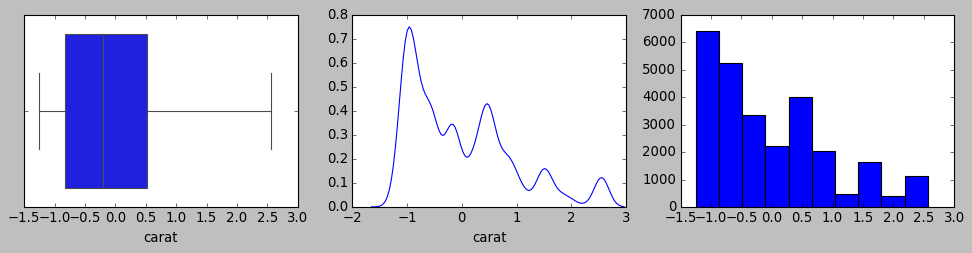

Column carat is not normally distributed

 2. Univariate analysis for cut 

Mean is 0.000000, Median is 0.081246, Mode(s) are 0.9796
Column cut does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


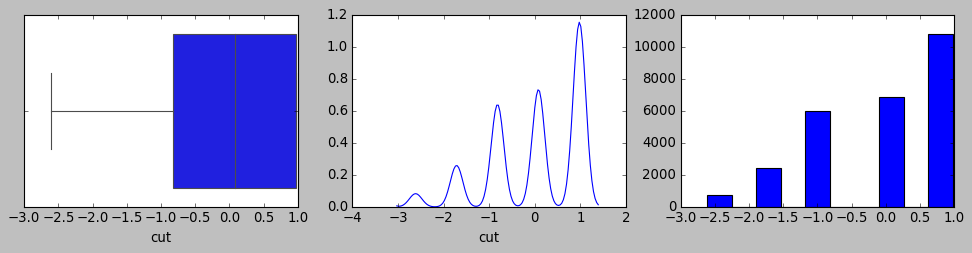

Column cut is not normally distributed

 3. Univariate analysis for color 

Mean is 0.000000, Median is -0.230890, Mode(s) are -0.2309
Column color does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


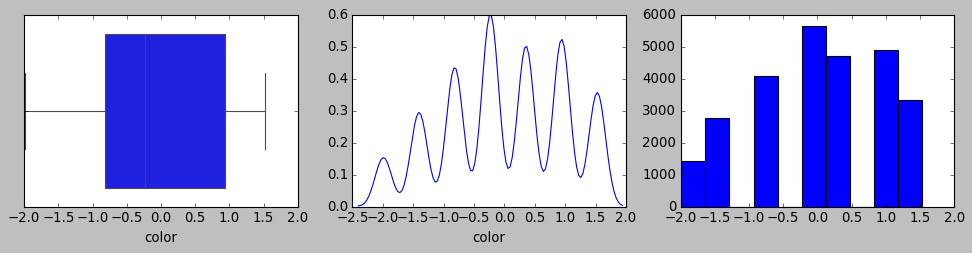

Column color is not normally distributed

 4. Univariate analysis for clarity 

Mean is 0.000000, Median is -0.032241, Mode(s) are -0.6394
Column clarity does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


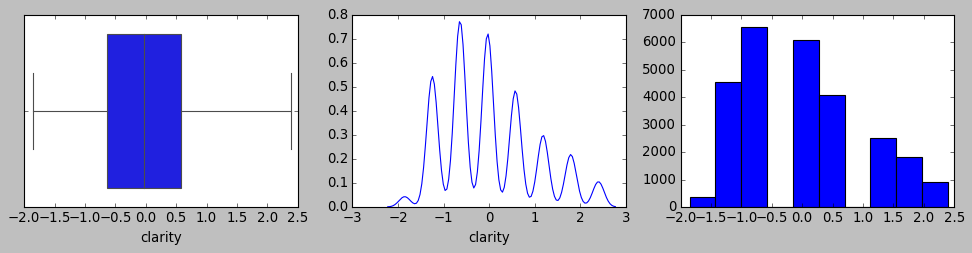

Column clarity is not normally distributed

 5. Univariate analysis for depth 

Mean is 0.002824, Median is 0.038319, Mode(s) are 0.0383
Column depth does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


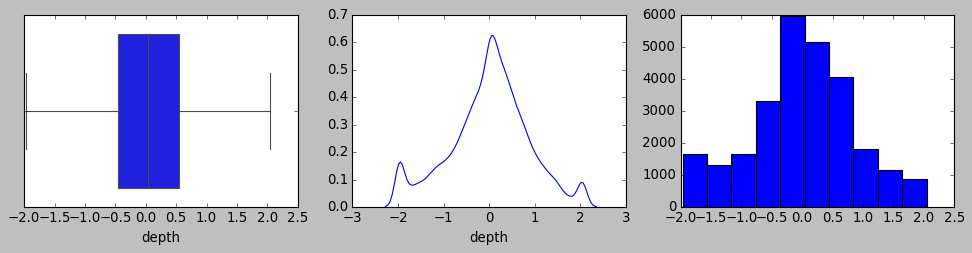

Column depth is not normally distributed

 6. Univariate analysis for table 

Mean is -0.009131, Median is -0.204334, Mode(s) are -0.6524
Column table does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


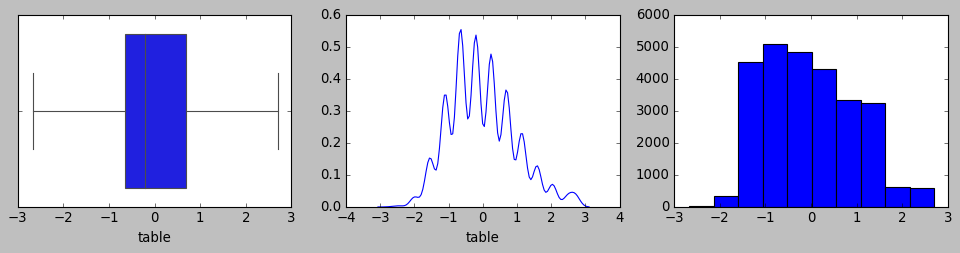

Column table is not normally distributed

 7. Univariate analysis for x 

Mean is 0.000044, Median is -0.035316, Mode(s) are -1.1962
Column x does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


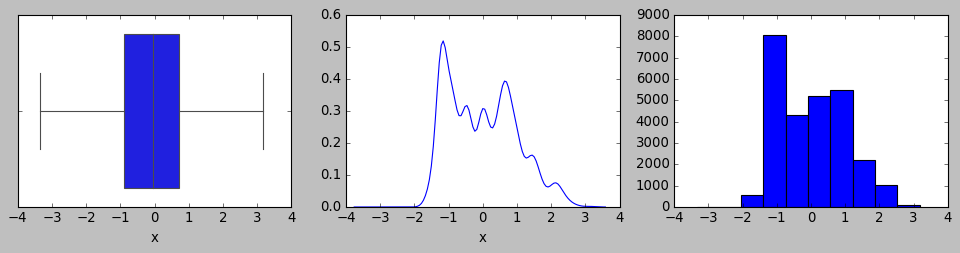

Column x is not normally distributed

 8. Univariate analysis for y 

Mean is -0.001456, Median is -0.020213, Mode(s) are -1.1866
Column y does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


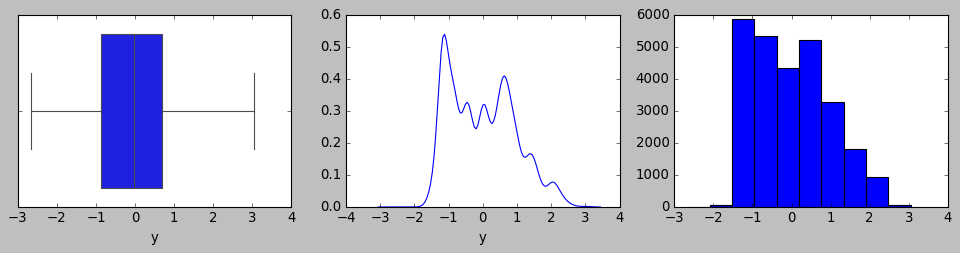

Column y is not normally distributed

 9. Univariate analysis for z 

Mean is -0.001105, Median is -0.025058, Mode(s) are -1.1769
Column z does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


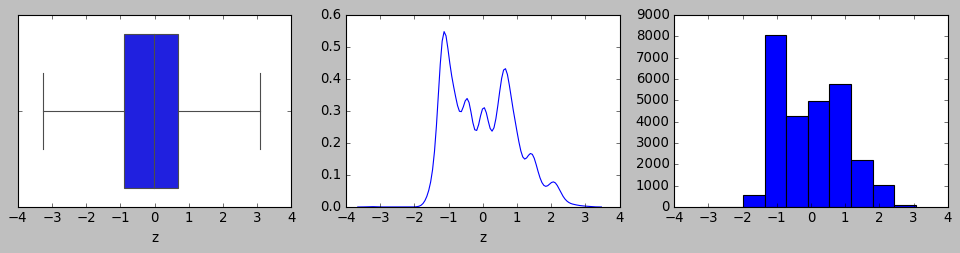

Column z is not normally distributed

 10. Univariate analysis for price 

Mean is -0.050091, Median is -0.388720, Mode(s) are 1.9984
Column price does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


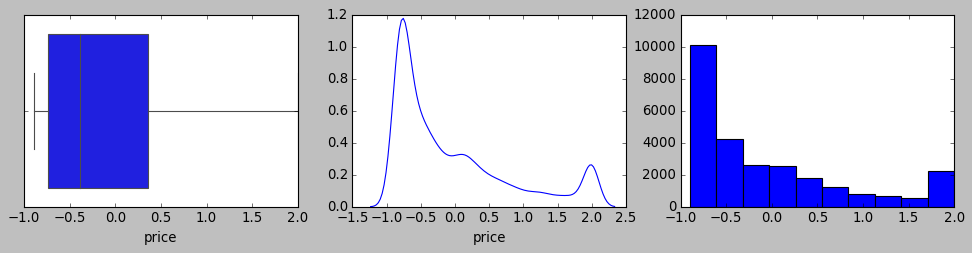

Column price is not normally distributed


In [287]:
univariate_analysis(df_cz_treated)

<Figure size 400x400 with 0 Axes>

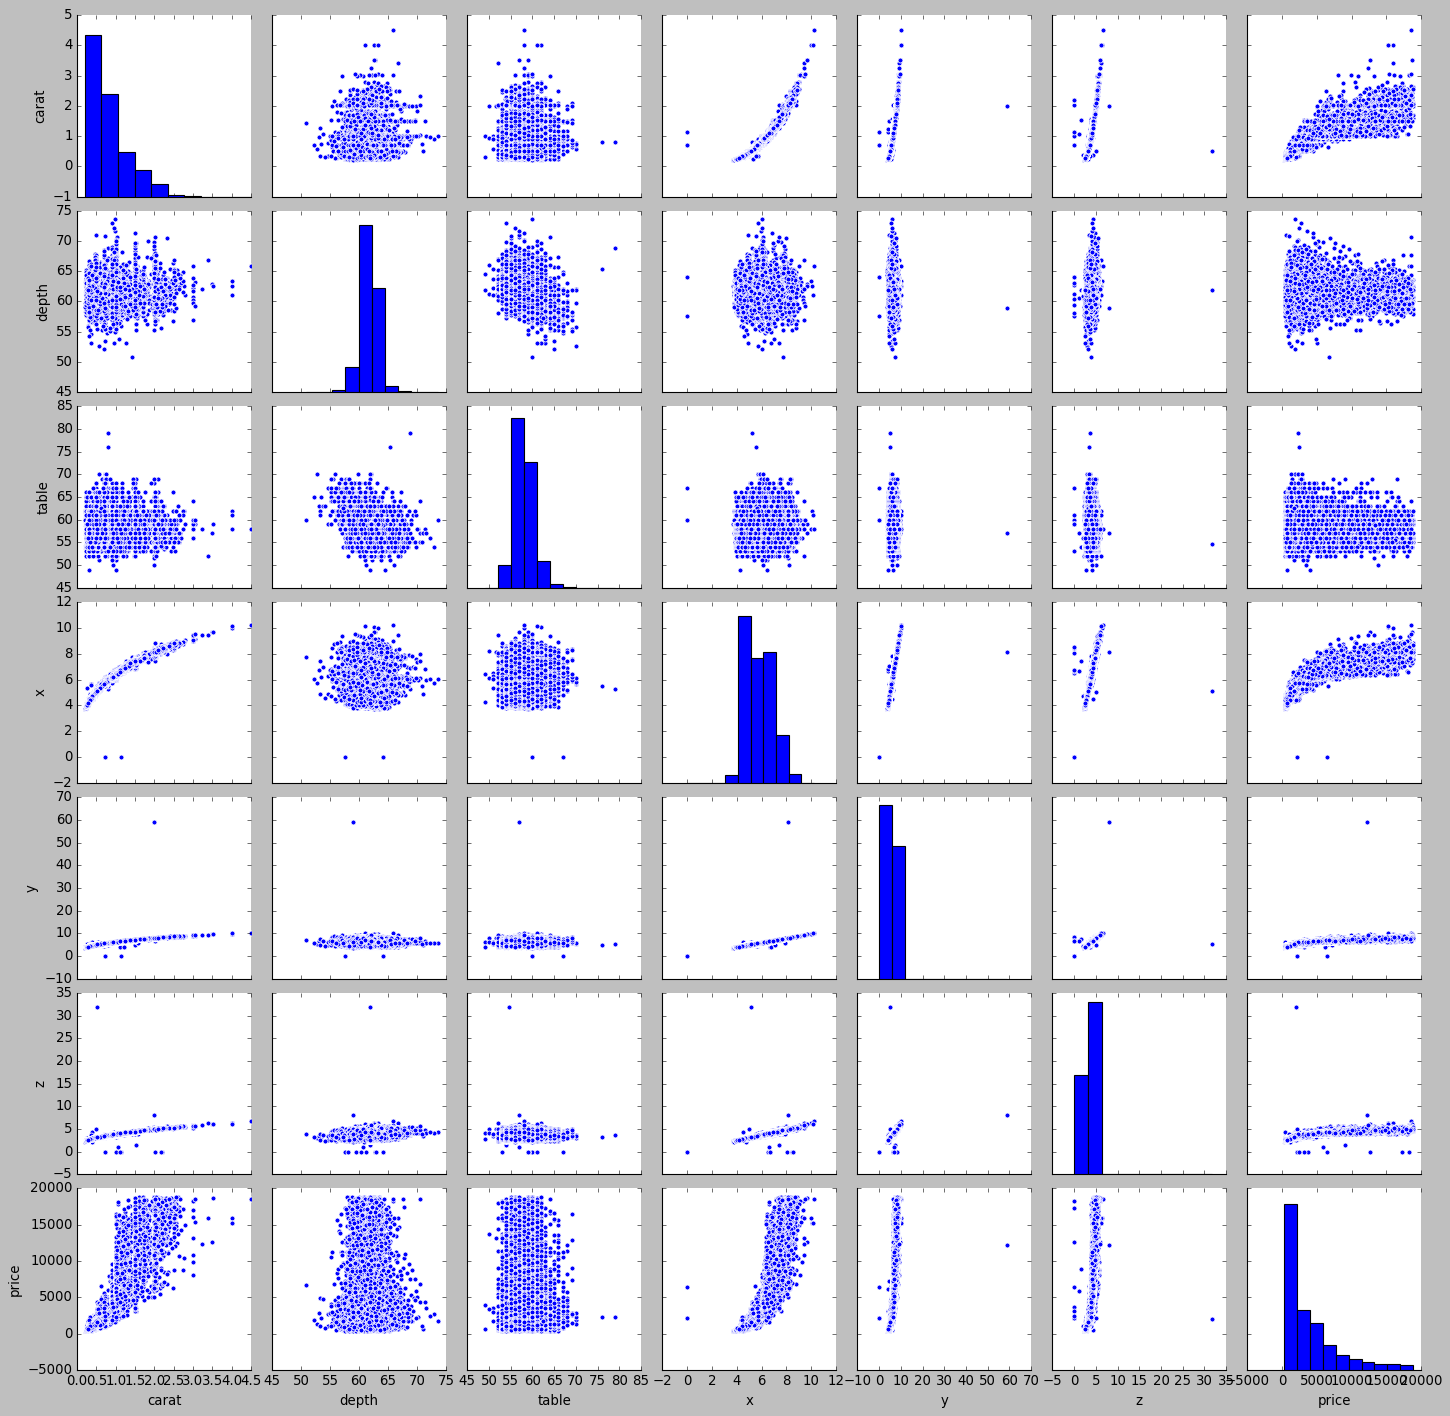

In [52]:
plt.figure(figsize=(5,5))
sns.pairplot(df_cz)

<Figure size 400x400 with 0 Axes>

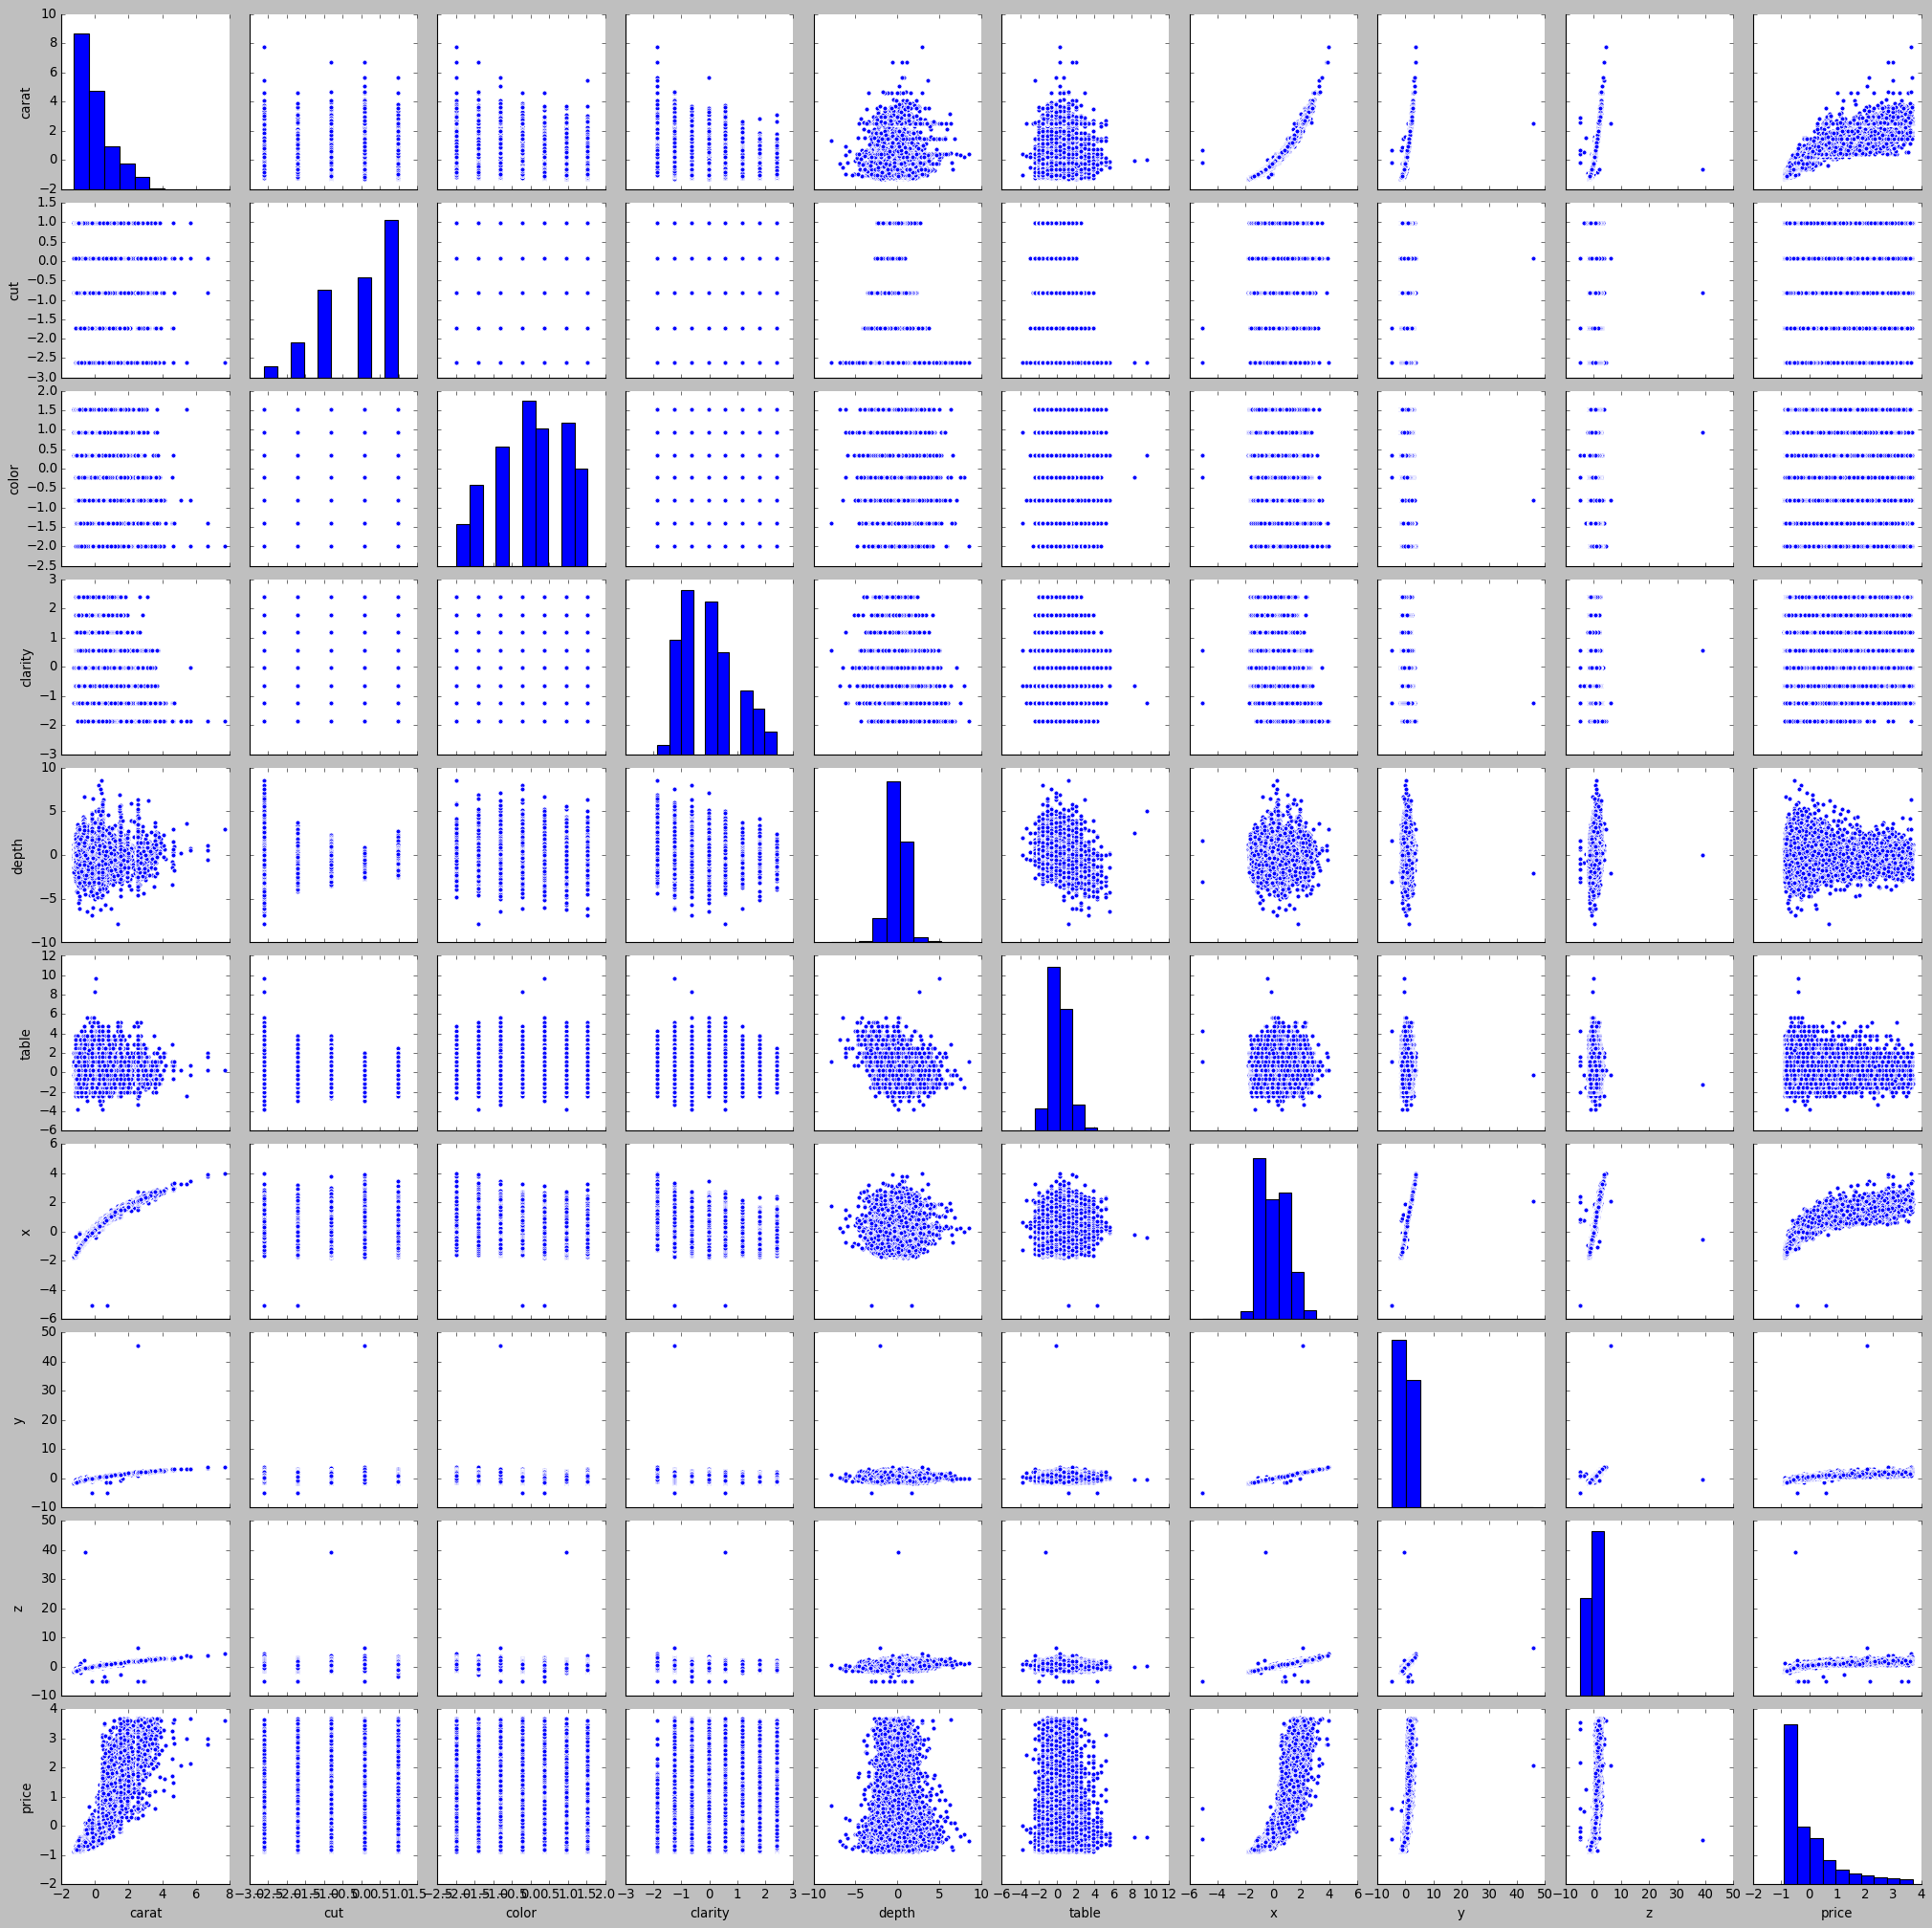

In [53]:
plt.figure(figsize=(5,5))
sns.pairplot(df_cz_scaled)

<AxesSubplot:>

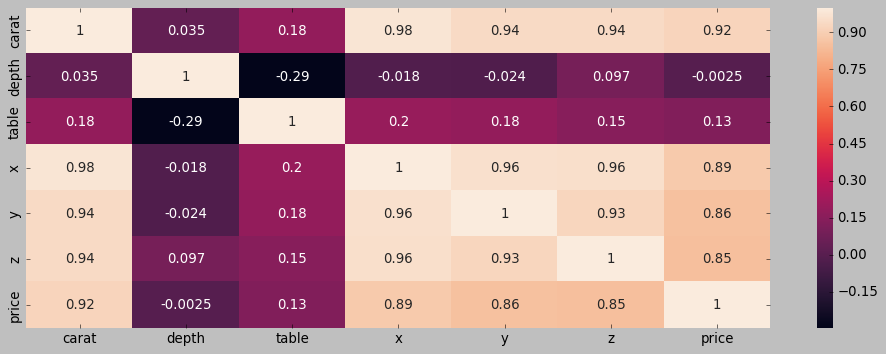

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(df_cz.corr(), annot=True)

<AxesSubplot:>

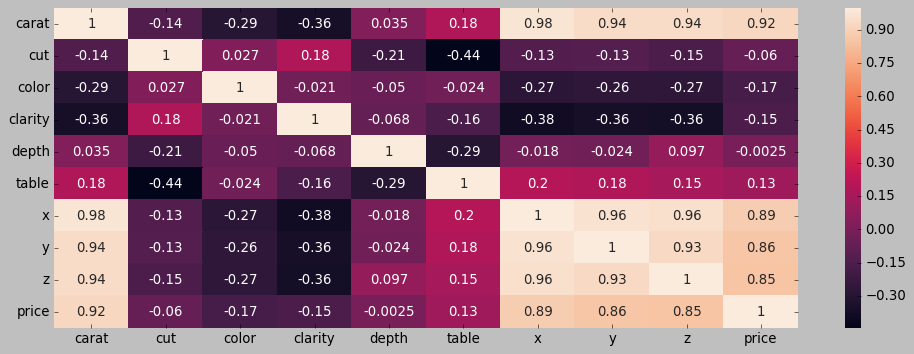

In [55]:
plt.figure(figsize=(15,5))
sns.heatmap(df_cz_scaled.corr(), annot=True)

<Figure size 400x400 with 0 Axes>

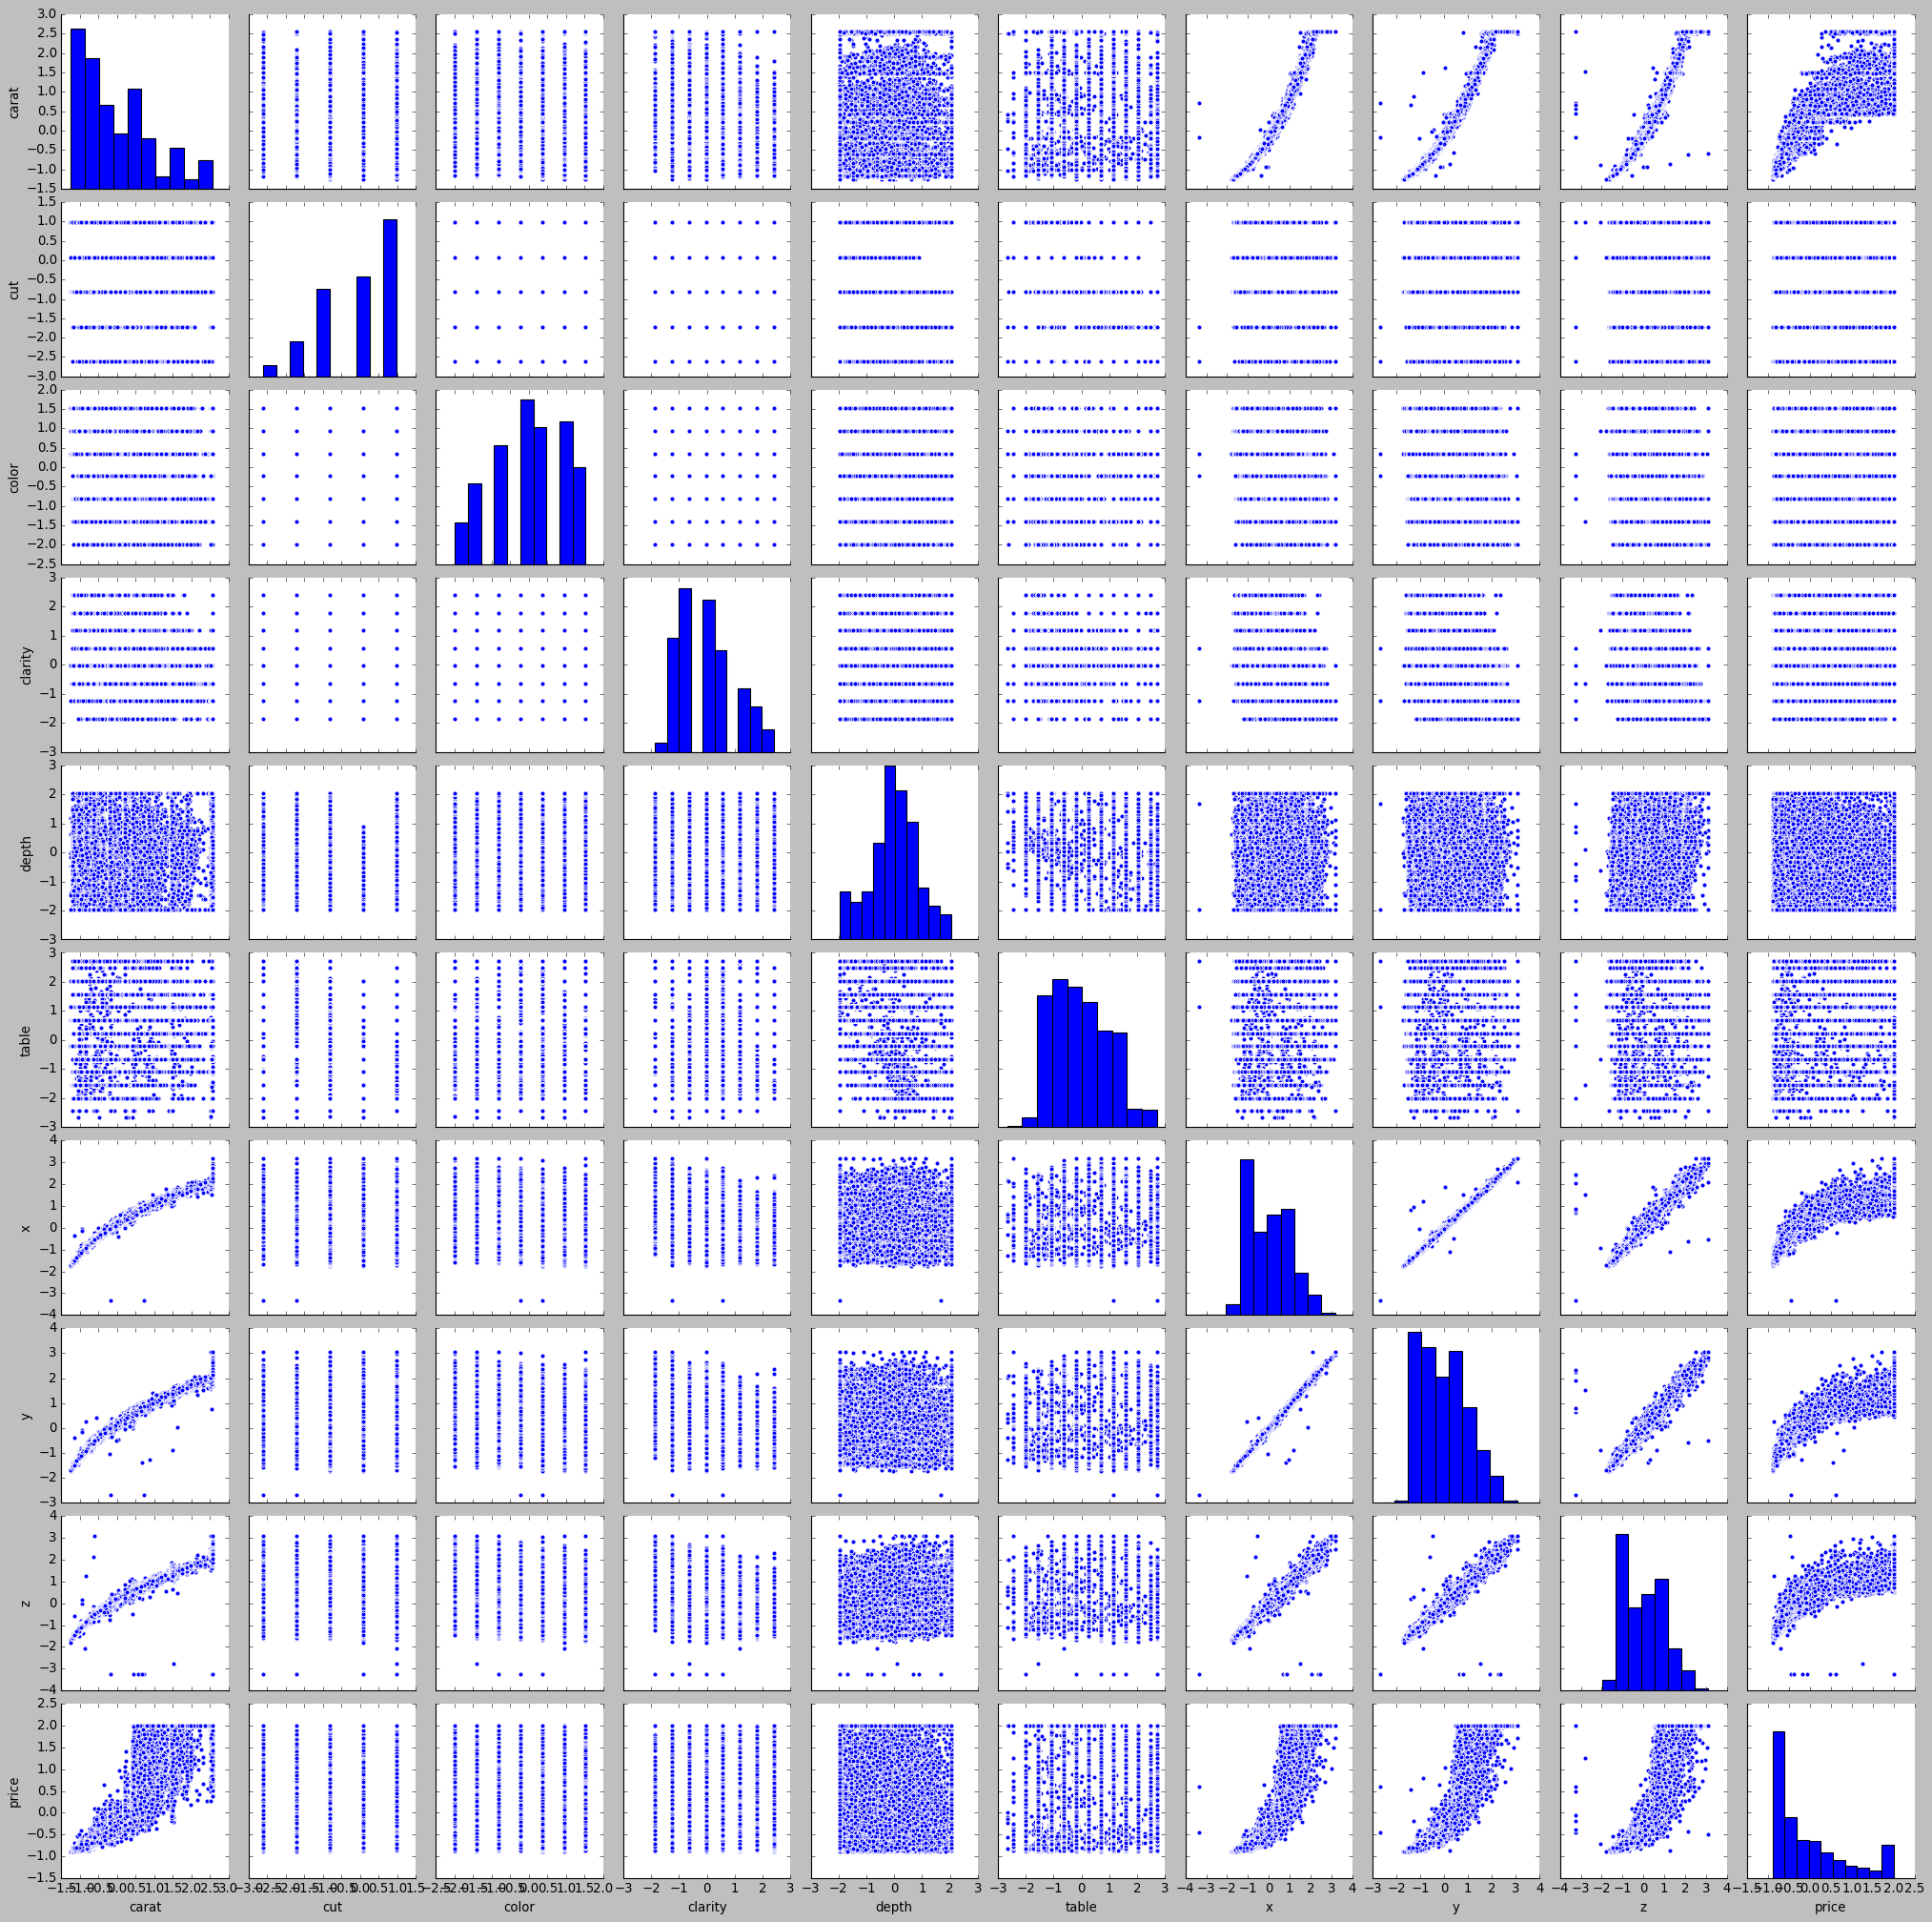

In [56]:
plt.figure(figsize=(5,5))
sns.pairplot(df_cz_treated)

<AxesSubplot:>

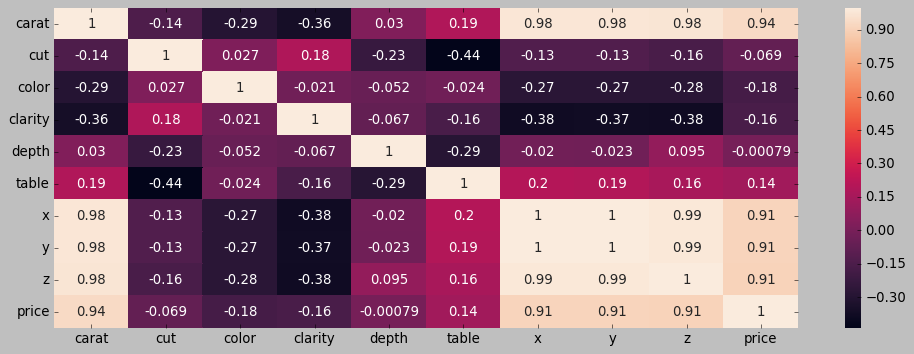

In [58]:
plt.figure(figsize=(15,5))
sns.heatmap(df_cz_treated.corr(), annot=True)

In [351]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
# X = df_cz_treated.drop(['price'], axis=1)
X = df_cz_treated.drop(['price','y','x','z'], axis=1) 
  
# Copy the 'price' column alone into the y dataframe. This is the dependent variable
Y = df_cz_treated[['price']]

In [352]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.30 , random_state=1)
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train1, Y_train1)

# Coefficients for each of the independent attributes in the ascending order

ctr=0
for columns in X_train1.columns[np.argsort(regression_model.coef_[0])]:
    print("The coefficient for {} is {}".format(columns, regression_model.coef_[0][np.argsort(regression_model.coef_[0])[ctr]]))
    ctr=ctr+1


The coefficient for table is -0.01129951113327071
The coefficient for depth is -0.005304086438910104
The coefficient for cut is 0.029182545923353516
The coefficient for color is 0.11530068733312876
The coefficient for clarity is 0.18198155324290508
The coefficient for carat is 0.9439609532639155


In [353]:
X_train1.describe()

carat           cut         color       clarity         depth  \
count  18876.000000  18876.000000  18876.000000  18876.000000  18876.000000   
mean      -0.010998     -0.008032     -0.001492      0.000503      0.004303   
std        0.967735      0.999851      0.999856      0.995418      0.875865   
min       -1.252522     -2.613667     -1.989430     -1.853722     -1.969594   
25%       -0.833881     -0.817058     -0.817070     -0.639402     -0.463659   
50%       -0.205920      0.081246     -0.230890     -0.032241      0.038319   
75%        0.526701      0.979550      0.941470      0.574919      0.540298   
max        2.567575      0.979550      1.527650      2.396400      2.046232   

              table  
count  18876.000000  
mean      -0.007321  
std        0.964069  
min       -2.668463  
25%       -0.652358  
50%       -0.204334  
75%        0.691712  
max        2.707817

In [354]:
X_test1.describe()

carat          cut        color      clarity        depth  \
count  8091.000000  8091.000000  8091.000000  8091.000000  8091.000000   
mean     -0.007707     0.018739     0.003481    -0.001174    -0.000625   
std       0.968546     1.000221     1.000450     1.010731     0.870040   
min      -1.252522    -2.613667    -1.989430    -1.853722    -1.969594   
25%      -0.833881    -0.817058    -0.817070    -0.639402    -0.463659   
50%      -0.205920     0.081246    -0.230890    -0.032241     0.038319   
75%       0.526701     0.979550     0.941470     0.574919     0.540298   
max       2.567575     0.979550     1.527650     2.396400     2.046232   

             table  
count  8091.000000  
mean     -0.013353  
std       0.972004  
min      -2.668463  
25%      -0.652358  
50%      -0.204334  
75%       0.691712  
max       2.707817

In [355]:
# intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.038438509307757884


In [356]:
regression_model.score(X_train1, Y_train1)

0.9308024313664021

In [357]:
# Model score - R2 or coeff of determinant

regression_model.score(X_test1, Y_test1)
# df_cz.info()

0.9288763576906688

In [345]:
mse = np.mean((regression_model.predict(X_test1)-Y_test1)**2)
math.sqrt(mse)

0.2288135274586359

In [347]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------
data_train = pd.concat([X_train1, Y_train1], axis=1)
data_train.head()
# lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1 = smf.ols(formula= 'price ~ carat+cut+table+color+clarity+table', data = data_train).fit()
lm1.params.sort_values(ascending=False) 

carat        0.943825
clarity      0.182268
color        0.115518
cut          0.031142
table       -0.008935
Intercept   -0.038430
dtype: float64

In [348]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.075e+04
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:08:27   Log-Likelihood:                 1174.3
No. Observations:               18876   AIC:                            -2337.
Df Residuals:                   18870   BIC:                            -2290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0384      0.002    -23.213      0.0

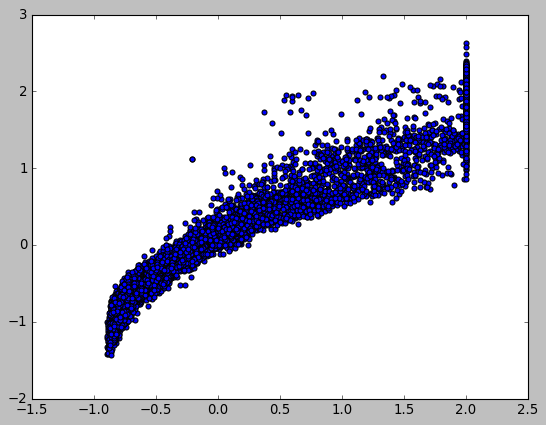

In [349]:
y_pred1 = regression_model.predict(X_test1)
plt.scatter(Y_test1['price'], y_pred1)

In [350]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

i=0
for column in X.columns[np.argsort(vif)]:
    print('VIF for {} is {}'.format(column,vif[np.argsort(vif)[i]]))
    i=i+1



VIF for color is 1.1182180001886444
VIF for clarity is 1.1987705393921508
VIF for carat is 1.3031075405289636
VIF for depth is 1.3231554005711066
VIF for cut is 1.4942796531076148
VIF for table is 1.580701029953695


In [358]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.04) * Intercept + (0.94) * carat + (0.03) * cut + (-0.01) * table + (0.12) * color + (0.18) * clarity + 

In [359]:
df_hp = pd.read_csv("Holiday_Package.csv",index_col=0)

In [360]:
df_hp.head()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
1               no   48412   30     8                  1                  1   
2              yes   37207   45     8                  0                  1   
3               no   58022   46     9                  0                  0   
4               no   66503   31    11                  2                  0   
5               no   66734   44    12                  0                  2   

  foreign  
1      no  
2      no  
3      no  
4      no  
5      no

In [361]:
df_hp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [362]:
df_hp.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [363]:
df_hp.describe(include='all')

Holliday_Package         Salary         age        educ  \
count               872     872.000000  872.000000  872.000000   
unique                2            NaN         NaN         NaN   
top                  no            NaN         NaN         NaN   
freq                471            NaN         NaN         NaN   
mean                NaN   47729.172018   39.955275    9.307339   
std                 NaN   23418.668531   10.551675    3.036259   
min                 NaN    1322.000000   20.000000    1.000000   
25%                 NaN   35324.000000   32.000000    8.000000   
50%                 NaN   41903.500000   39.000000    9.000000   
75%                 NaN   53469.500000   48.000000   12.000000   
max                 NaN  236961.000000   62.000000   21.000000   

        no_young_children  no_older_children foreign  
count          872.000000         872.000000     872  
unique                NaN                NaN       2  
top                   NaN                NaN      no  
freq                  NaN                NaN     656  
mean             0.311927           0.982798     NaN  
std              0.612870           1.086786     NaN  
min              0.000000           0.000000     NaN  
25%              0.000000           0.000000     NaN  
50%              0.000000           1.000000     NaN  
75%              0.000000           2.000000     NaN  
max              3.000000           6.000000     NaN

In [364]:
df_hp.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [365]:
df_hp.duplicated().sum()

0

In [366]:
df_hp['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [367]:
df_hp['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [368]:
df_hp.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [369]:
for column in df_hp.columns:
    if df_hp[column].dtype == 'object':
        print(column.upper(),': ',df_hp[column].nunique())
        print(df_hp[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [370]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [371]:
feature_encoding = {"Holliday_Package":     {"yes": 1, "no": 0}}
#                 "foreign": {"yes": 1, "no": 0}}

df_hp_enc=df_hp.replace(feature_encoding)
df_hp_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    int64 
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(6), object(1)
memory usage: 54.5+ KB


In [373]:
df_hp_enc = pd.get_dummies(df_hp_enc)
df_hp_enc.head()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
1                 0   48412   30     8                  1                  1   
2                 1   37207   45     8                  0                  1   
3                 0   58022   46     9                  0                  0   
4                 0   66503   31    11                  2                  0   
5                 0   66734   44    12                  0                  2   

   foreign_no  foreign_yes  
1           1            0  
2           1            0  
3           1            0  
4           1            0  
5           1            0


 1. Univariate analysis for Salary 

Mean is 47729.172018, Median is 41903.500000, Mode(s) are 32197.0000
Column Salary has outliers


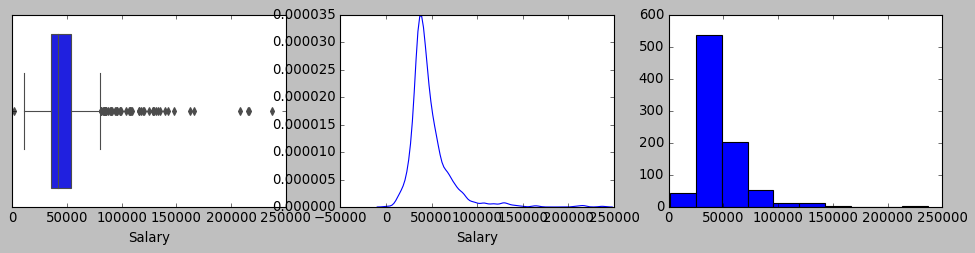

Column Salary is not normally distributed

 2. Univariate analysis for age 

Mean is 39.955275, Median is 39.000000, Mode(s) are 44.0000
Column age does not have outliers


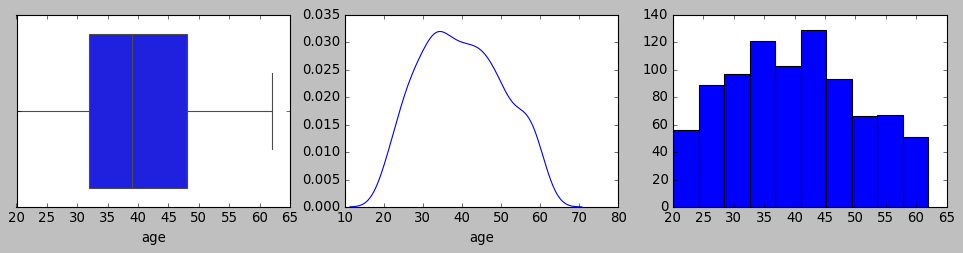

Column age is not normally distributed

 3. Univariate analysis for educ 

Mean is 9.307339, Median is 9.000000, Mode(s) are 8.0000
Column educ has outliers


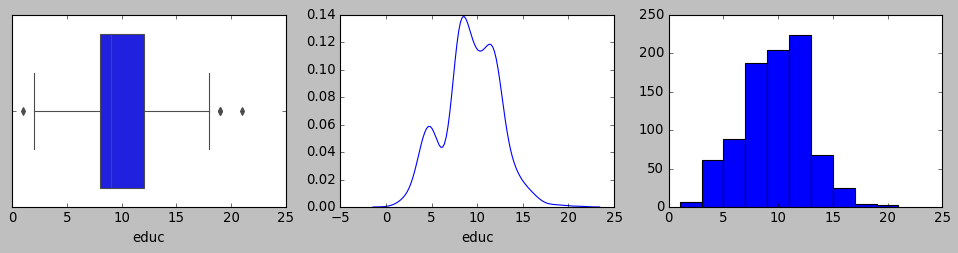

Column educ is not normally distributed

 4. Univariate analysis for no_young_children 

Mean is 0.311927, Median is 0.000000, Mode(s) are 0.0000
Column no_young_children has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


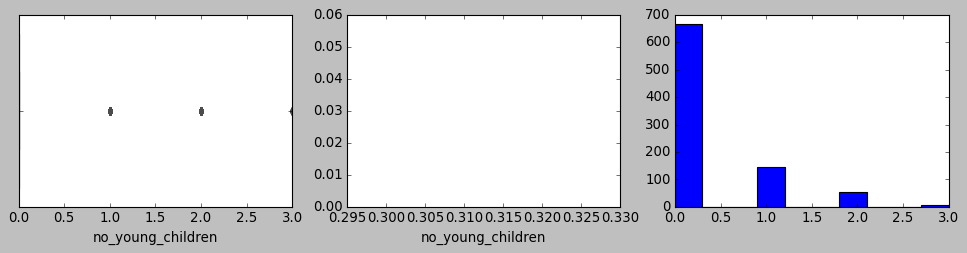

Column no_young_children is not normally distributed

 5. Univariate analysis for no_older_children 

Mean is 0.982798, Median is 1.000000, Mode(s) are 0.0000
Column no_older_children has outliers


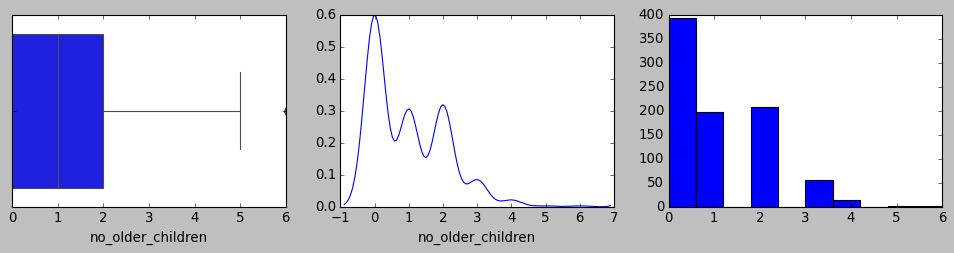

Column no_older_children is not normally distributed


In [374]:
univariate_analysis(df_hp.drop(['Holliday_Package','foreign'],axis=1))


 1. Univariate analysis for Holliday_Package 

Mean is 0.459862, Median is 0.000000, Mode(s) are 0.0000
Column Holliday_Package does not have outliers


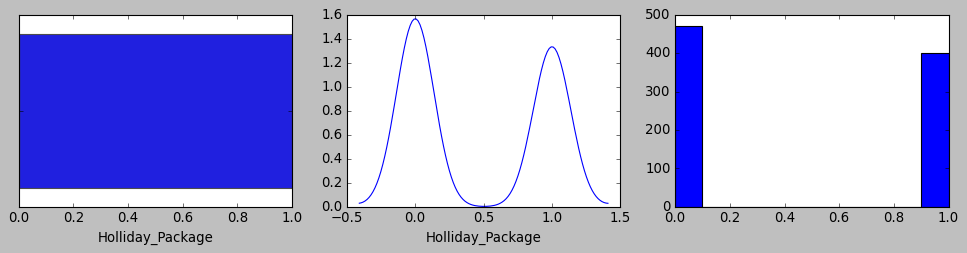

Column Holliday_Package is not normally distributed

 2. Univariate analysis for Salary 

Mean is 47729.172018, Median is 41903.500000, Mode(s) are 32197.0000
Column Salary has outliers


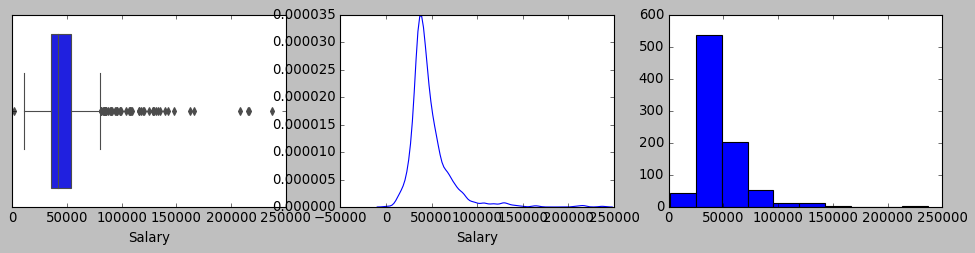

Column Salary is not normally distributed

 3. Univariate analysis for age 

Mean is 39.955275, Median is 39.000000, Mode(s) are 44.0000
Column age does not have outliers


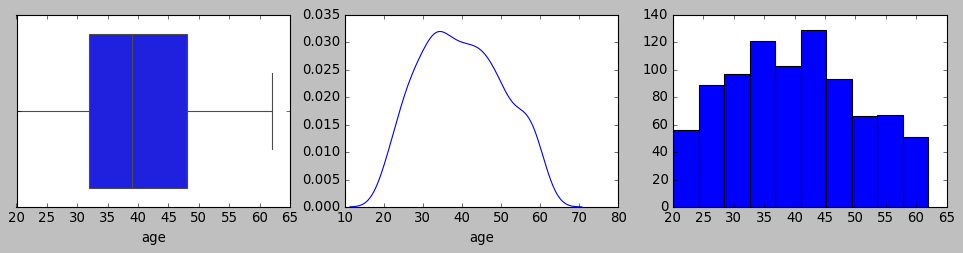

Column age is not normally distributed

 4. Univariate analysis for educ 

Mean is 9.307339, Median is 9.000000, Mode(s) are 8.0000
Column educ has outliers


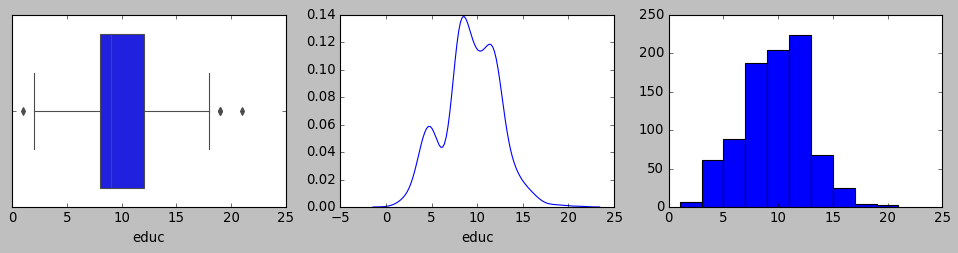

Column educ is not normally distributed

 5. Univariate analysis for no_young_children 

Mean is 0.311927, Median is 0.000000, Mode(s) are 0.0000
Column no_young_children has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


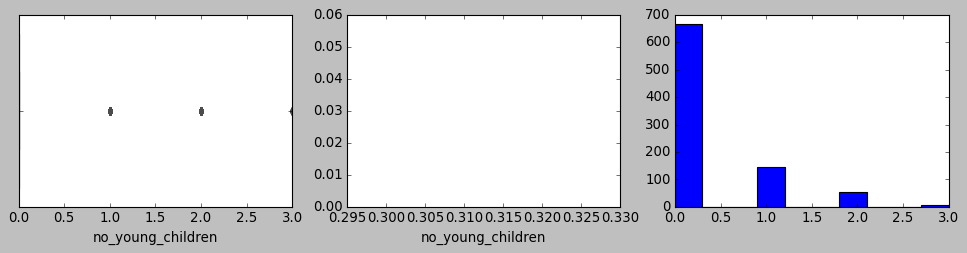

Column no_young_children is not normally distributed

 6. Univariate analysis for no_older_children 

Mean is 0.982798, Median is 1.000000, Mode(s) are 0.0000
Column no_older_children has outliers


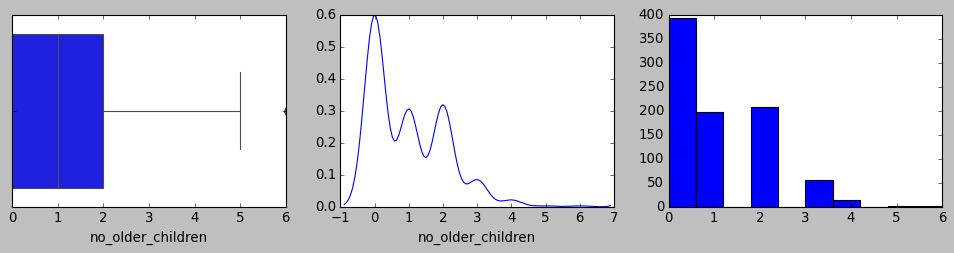

Column no_older_children is not normally distributed

 7. Univariate analysis for foreign_no 

Mean is 0.752294, Median is 1.000000, Mode(s) are 1.0000
Column foreign_no has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


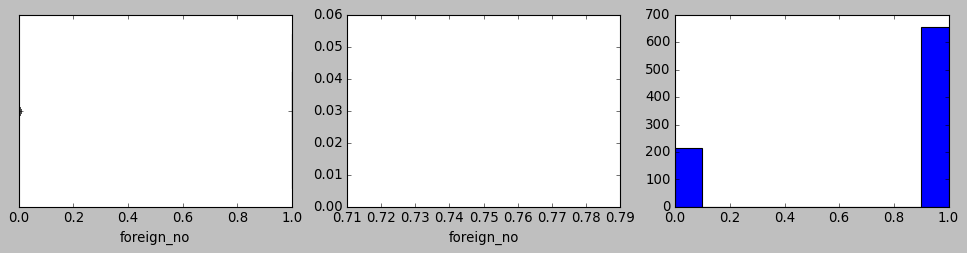

Column foreign_no is not normally distributed

 8. Univariate analysis for foreign_yes 

Mean is 0.247706, Median is 0.000000, Mode(s) are 0.0000
Column foreign_yes has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


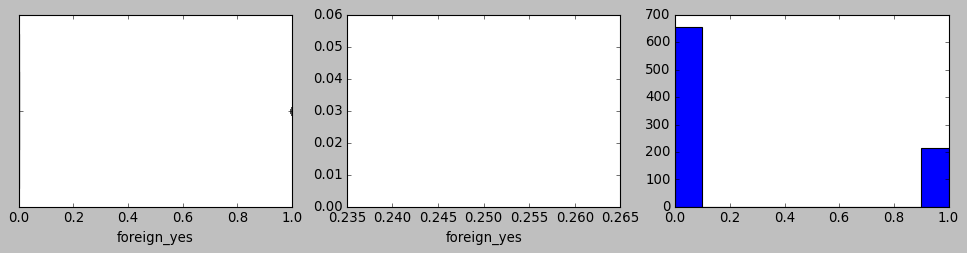

Column foreign_yes is not normally distributed


In [375]:
univariate_analysis(df_hp_enc)

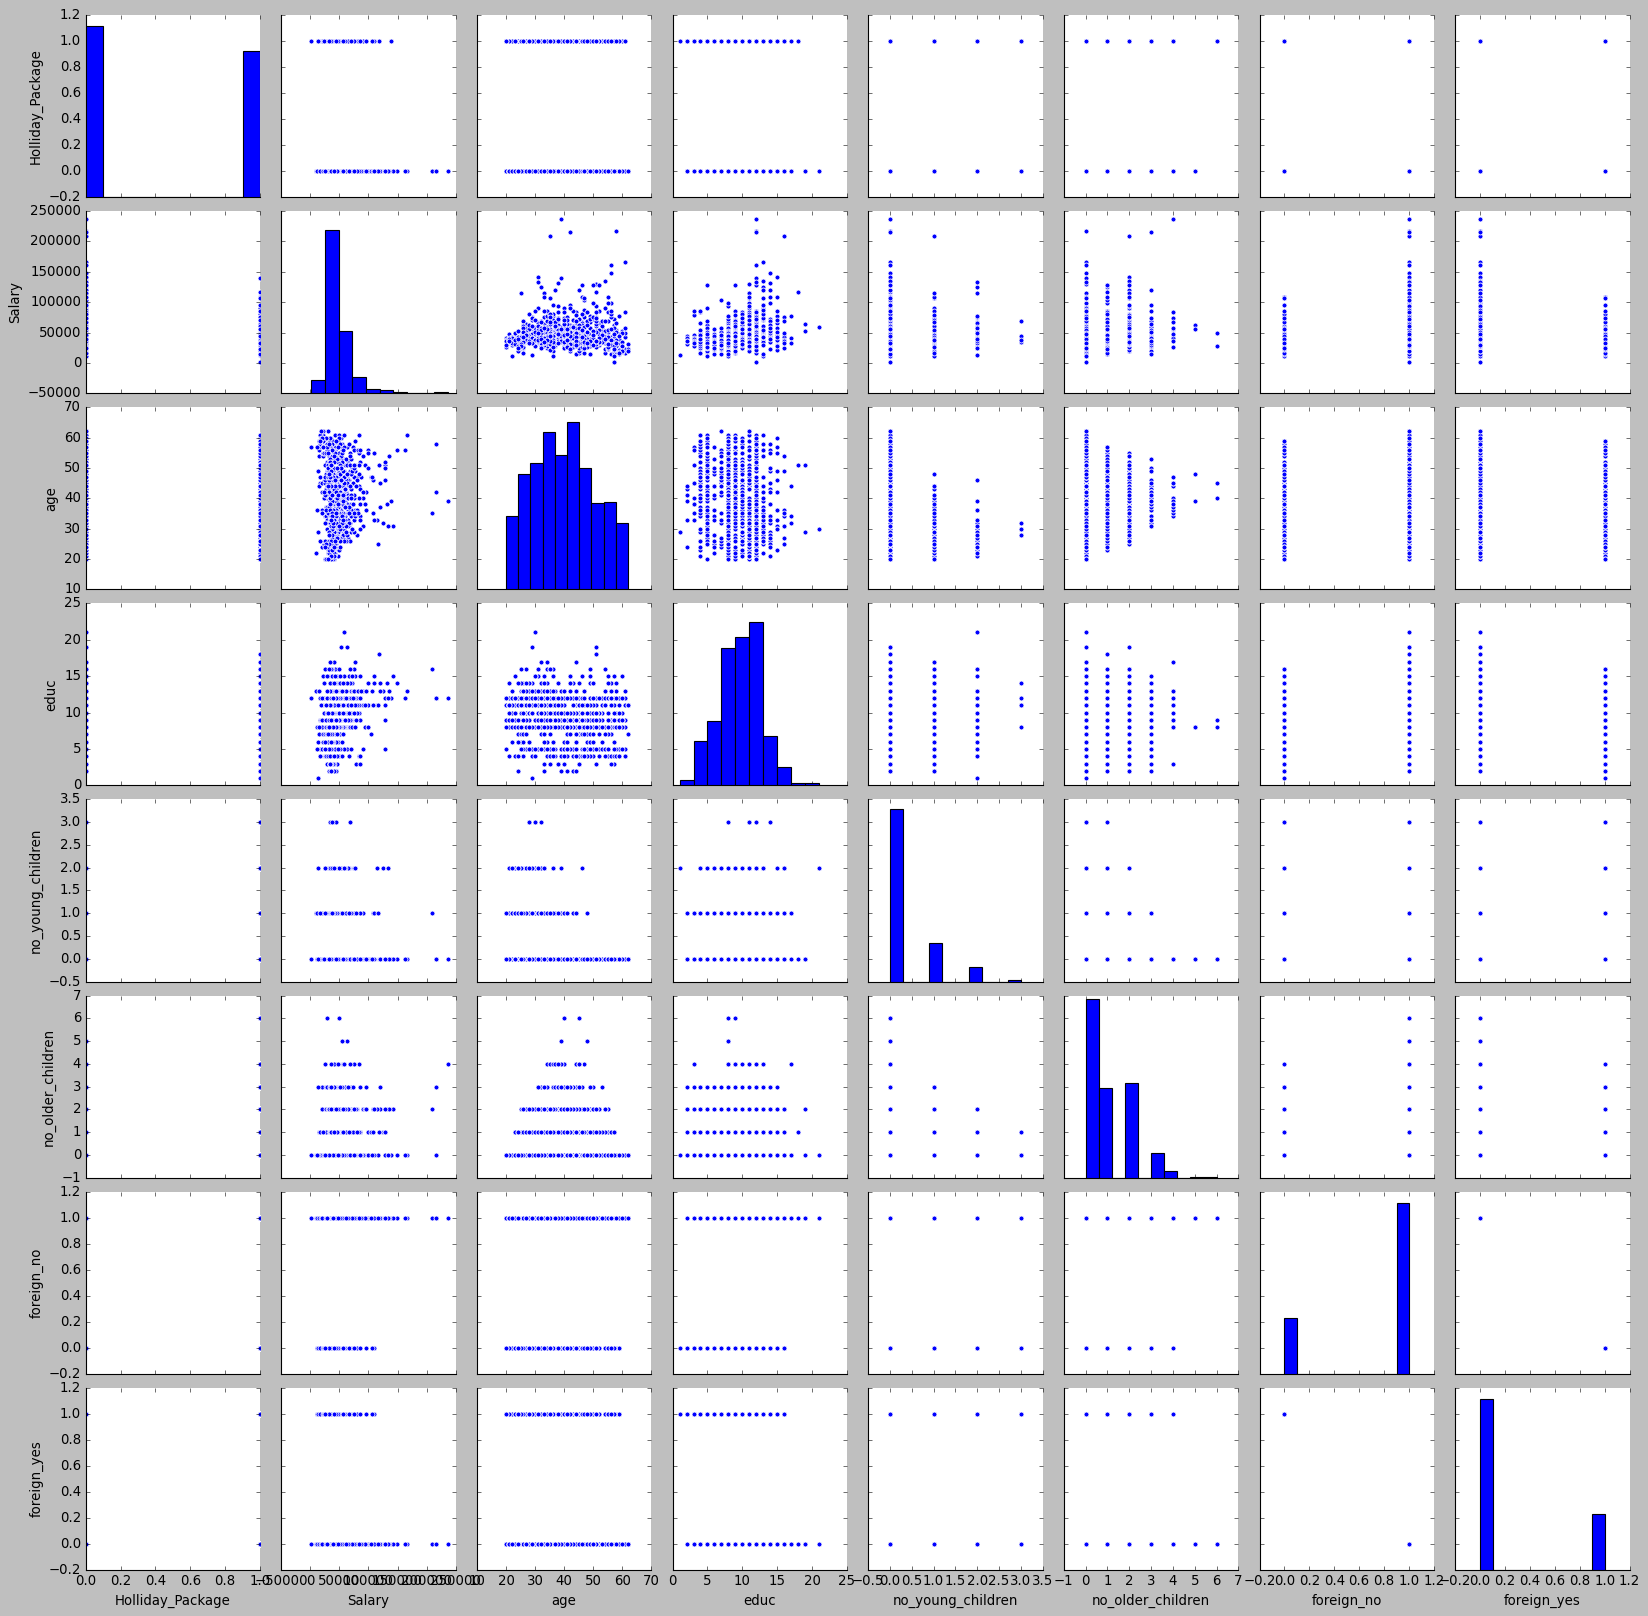

In [376]:
sns.pairplot(df_hp_enc)

<AxesSubplot:>

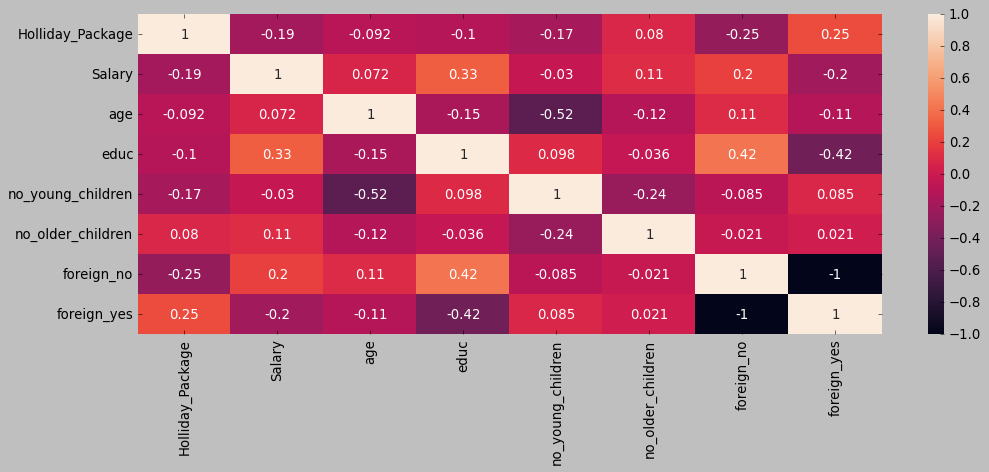

In [377]:
plt.figure(figsize=(15,5))
sns.heatmap(df_hp_enc.corr(), annot=True)

8105.75
80687.75

 1. Univariate analysis for Holliday_Package 

Mean is 0.459862, Median is 0.000000, Mode(s) are 0.0000
Column Holliday_Package does not have outliers


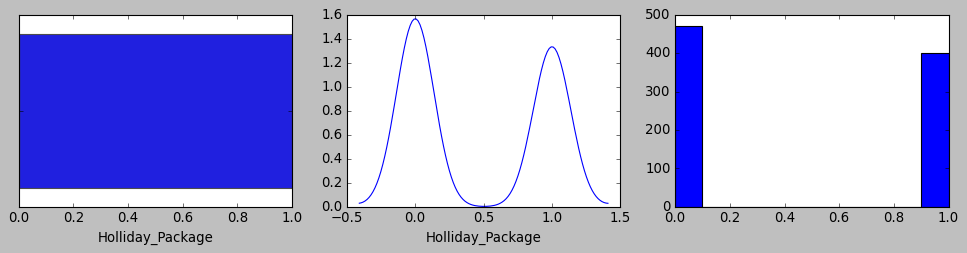

Column Holliday_Package is not normally distributed

 2. Univariate analysis for Salary 

Mean is 45608.336869, Median is 41903.500000, Mode(s) are 80687.7500
Column Salary does not have outliers


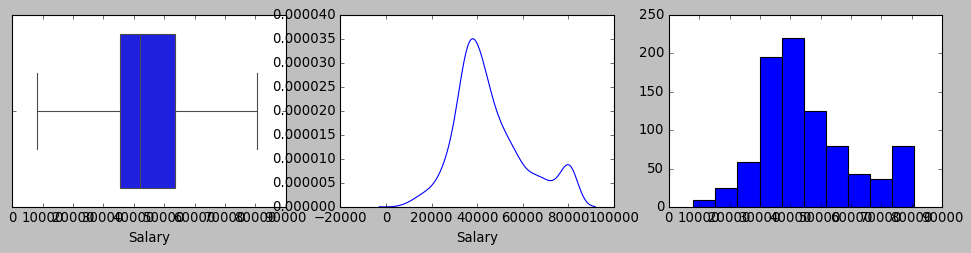

Column Salary is not normally distributed

 3. Univariate analysis for age 

Mean is 39.955275, Median is 39.000000, Mode(s) are 44.0000
Column age does not have outliers


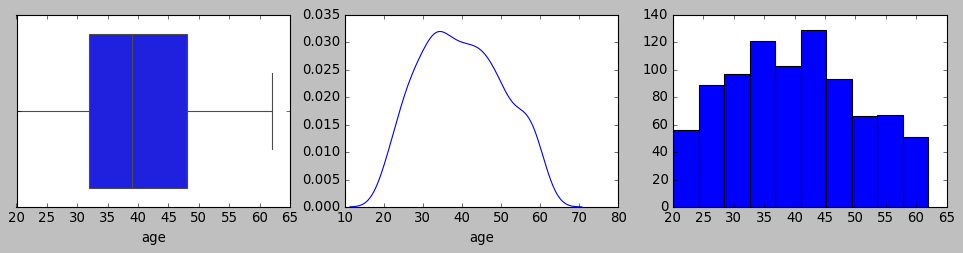

Column age is not normally distributed

 4. Univariate analysis for educ 

Mean is 9.307339, Median is 9.000000, Mode(s) are 8.0000
Column educ has outliers


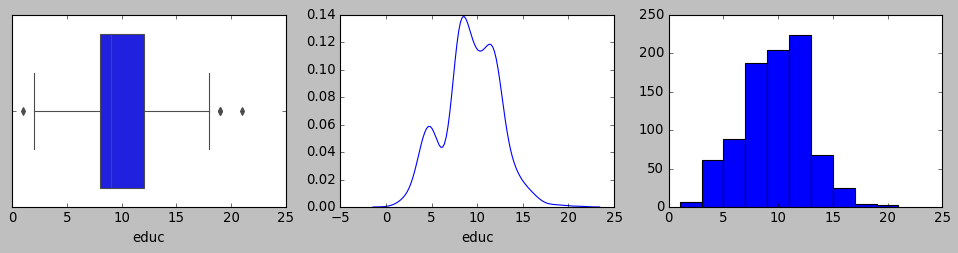

Column educ is not normally distributed

 5. Univariate analysis for no_young_children 

Mean is 0.311927, Median is 0.000000, Mode(s) are 0.0000
Column no_young_children has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


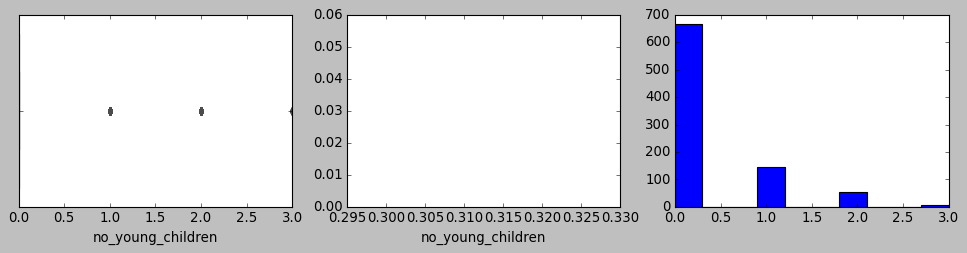

Column no_young_children is not normally distributed

 6. Univariate analysis for no_older_children 

Mean is 0.982798, Median is 1.000000, Mode(s) are 0.0000
Column no_older_children has outliers


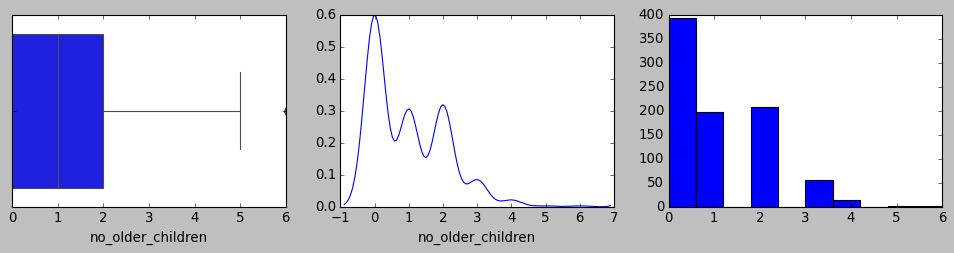

Column no_older_children is not normally distributed

 7. Univariate analysis for foreign_no 

Mean is 0.752294, Median is 1.000000, Mode(s) are 1.0000
Column foreign_no has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


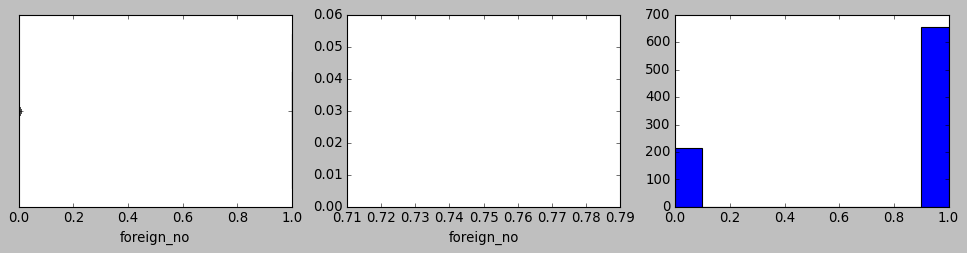

Column foreign_no is not normally distributed

 8. Univariate analysis for foreign_yes 

Mean is 0.247706, Median is 0.000000, Mode(s) are 0.0000
Column foreign_yes has outliers


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


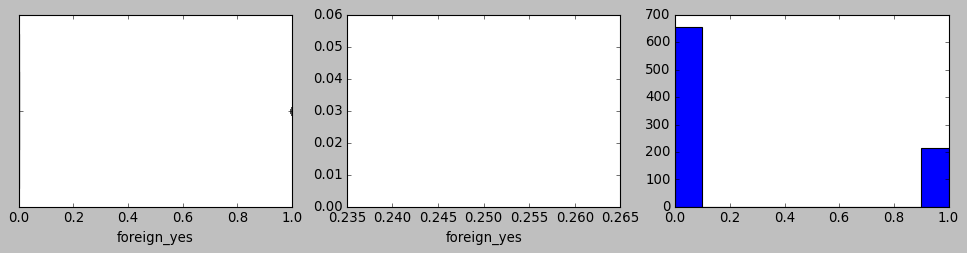

Column foreign_yes is not normally distributed


In [452]:

df_hp_treated = df_hp_enc.copy()

Salary_IQR= df_hp_treated['Salary'].quantile(0.75) -df_hp_treated['Salary'].quantile(0.25)

whisker_left_Salary=float(np.percentile(df_hp_treated['Salary'],[25]))-(1.5*Salary_IQR)
df_hp_treated.loc[df_hp_treated[df_hp_treated['Salary']<whisker_left_Salary].index,'Salary']=whisker_left_Salary
print(whisker_left_Salary)

whisker_right_Salary=float(np.percentile(df_hp_treated['Salary'],[75]))+(1.5*Salary_IQR)
df_hp_treated.loc[df_hp_treated[df_hp_treated['Salary']>whisker_right_Salary].index,'Salary']=whisker_right_Salary
print(whisker_right_Salary)

# educ_IQR= df_hp_treated['educ'].quantile(0.75) -df_hp_treated['educ'].quantile(0.25)

# whisker_left_educ=float(np.percentile(df_hp_treated['educ'],[25]))-(1.5*educ_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['educ']<whisker_left_Salary].index,'educ']=whisker_left_educ
# print(whisker_left_educ)

# whisker_right_educ=float(np.percentile(df_hp_treated['educ'],[75]))+(1.5*educ_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['educ']>whisker_right_educ].index,'educ']=whisker_right_educ
# print(whisker_right_educ)

# no_young_children_IQR= df_hp_treated['no_young_children'].quantile(0.75) -df_hp_treated['no_young_children'].quantile(0.25)

# whisker_left_no_young_children=float(np.percentile(df_hp_treated['no_young_children'],[25]))-(1.5*no_young_children_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['no_young_children']<whisker_left_Salary].index,'no_young_children']=whisker_left_no_young_children
# print(whisker_left_no_young_children)

# whisker_right_no_young_children=float(np.percentile(df_hp_treated['no_young_children'],[75]))+(1.5*no_young_children_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['no_young_children']>whisker_right_no_young_children].index,'no_young_children']=whisker_right_no_young_children
# print(whisker_right_no_young_children)

# no_older_children_IQR= df_hp_treated['no_older_children'].quantile(0.75) -df_hp_treated['no_older_children'].quantile(0.25)

# whisker_left_no_older_children=float(np.percentile(df_hp_treated['no_older_children'],[25]))-(1.5*no_older_children_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['no_older_children']<whisker_left_Salary].index,'no_older_children']=whisker_left_no_older_children
# print(whisker_left_no_older_children)

# whisker_right_no_older_children=float(np.percentile(df_hp_treated['no_older_children'],[75]))+(1.5*no_older_children_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['no_older_children']>whisker_right_no_older_children].index,'no_older_children']=whisker_right_no_older_children
# print(whisker_right_no_older_children)

# foreign_IQR= df_hp_treated['foreign'].quantile(0.75) -df_hp_treated['foreign'].quantile(0.25)
# whisker_left_foreign=float(np.percentile(df_hp_treated['foreign'],[25]))-(1.5*foreign_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['foreign']<whisker_left_Salary].index,'foreign']=whisker_left_foreign
# print(whisker_left_foreign)
# whisker_right_foreign=float(np.percentile(df_hp_treated['foreign'],[75]))+(1.5*foreign_IQR)
# df_hp_treated.loc[df_hp_treated[df_hp_treated['foreign']>whisker_right_foreign].index,'foreign']=whisker_right_foreign
# print(whisker_right_foreign)

univariate_analysis(df_hp_treated)

In [444]:
# X = df_hp_treated.drop(['Holliday_Package','no_older_children','educ'],axis=1)
X = df_hp_treated.drop(['Holliday_Package','no_older_children','educ','foreign_no','Salary'],axis=1)
Y = df_hp_treated.pop('Holliday_Package')

In [445]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 3)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 3)
Number of rows and columns of the test set for the dependent variable: (262,)


In [432]:
X_train.describe()

age  no_young_children  foreign_yes
count  610.000000         610.000000   610.000000
mean    39.455738           0.337705     0.255738
std     10.437342           0.643820     0.436633
min     20.000000           0.000000     0.000000
25%     31.000000           0.000000     0.000000
50%     38.000000           0.000000     0.000000
75%     47.000000           0.000000     1.000000
max     62.000000           3.000000     1.000000

In [433]:
X_test.describe()

age  no_young_children  foreign_yes
count  262.000000         262.000000   262.000000
mean    41.118321           0.251908     0.229008
std     10.743497           0.530214     0.420998
min     20.000000           0.000000     0.000000
25%     33.000000           0.000000     0.000000
50%     42.000000           0.000000     0.000000
75%     49.000000           0.000000     0.000000
max     62.000000           3.000000     1.000000

In [446]:

hp_train = pd.concat([X_train, Y_train], axis=1)
# lm1 = smf.ols(formula= 'Holliday_Package ~ Salary+age+no_young_children+foreign_yes+foreign_no', data = hp_train).fit()
lm1 = smf.ols(formula= 'Holliday_Package ~ age+no_young_children+foreign_yes', data = hp_train).fit()
lm1.params.sort_values(ascending=False) 
print(lm1.summary())
# X_train.head(10)

                            OLS Regression Results                            
Dep. Variable:       Holliday_Package   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.60
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.19e-20
Time:                        13:02:08   Log-Likelihood:                -392.62
No. Observations:                 610   AIC:                             793.2
Df Residuals:                     606   BIC:                             810.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9820      0.09

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Training score:
 0.6639344262295082
Test score:
 0.6526717557251909
Confusion matrix for training data set:
 [[240  89]
 [116 165]]
Confusion matrix for testing data set:
 [[107  35]
 [ 56  64]]
classification report for training data set:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       329
           1       0.65      0.59      0.62       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610

classification report for testing data set:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       142
           1       0.65      0.53      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262

AUC for the Training Data: 0.658
AUC for the Test Data: 0.64

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished


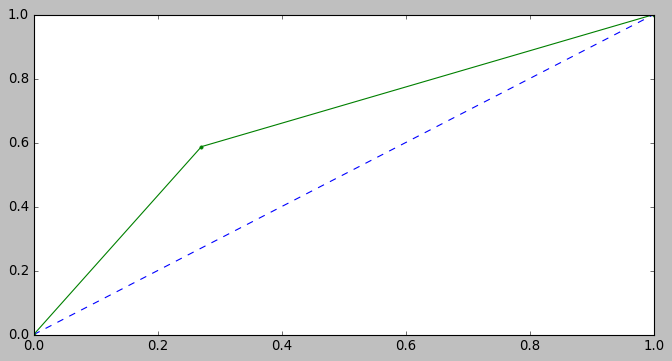

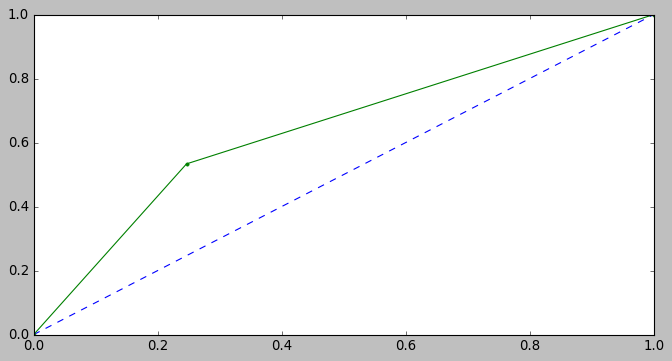

In [447]:
##### model = LogisticRegression()
model = LogisticRegression(solver='newton-cg',max_iter=100,penalty='none',verbose=True,n_jobs=2)
# model = LogisticRegression(solver='liblinear',max_iter=10000,verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)


# Training Data Probability Prediction
pred_prob_train = model.predict(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict(X_test)

print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_prob_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_prob_test))
print("classification report for training data set:\n",metrics.classification_report(Y_train, pred_prob_train))
print("classification report for testing data set:\n",metrics.classification_report(Y_test, pred_prob_test))
# calculate AUC

auc = metrics.roc_auc_score(Y_train,pred_prob_train)
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train)
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test)
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [448]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

i=0
for column in X.columns[np.argsort(vif)]:
    print('VIF for {} is {}'.format(column,vif[np.argsort(vif)[i]]))
    i=i+1

VIF for no_young_children is 1.1486607869453156
VIF for foreign_yes is 1.3032977526674505
VIF for age is 1.3291752403875914


In [455]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.98) * Intercept + (-0.01) * age + (-0.26) * no_young_children + (0.27) * foreign_yes + 

In [453]:
X = df_hp_treated.drop(['Holliday_Package','no_older_children','educ'],axis=1)
# X = df_hp_treated.drop('Holliday_Package',axis=1)
Y = df_hp_treated.pop('Holliday_Package')
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 5)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 5)
Number of rows and columns of the test set for the dependent variable: (262,)


Training score:
 0.6557377049180327
Test score:
 0.6679389312977099
Confusion matrix for training data set:
 [[242  87]
 [123 158]]
Confusion matrix for testing data set:
 [[110  32]
 [ 55  65]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.74      0.70       329
           1       0.64      0.56      0.60       281

    accuracy                           0.66       610
   macro avg       0.65      0.65      0.65       610
weighted avg       0.65      0.66      0.65       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.67      0.54      0.60       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262
 

AUC for the Training Data: 0.728
AUC for the Test Data: 0.7

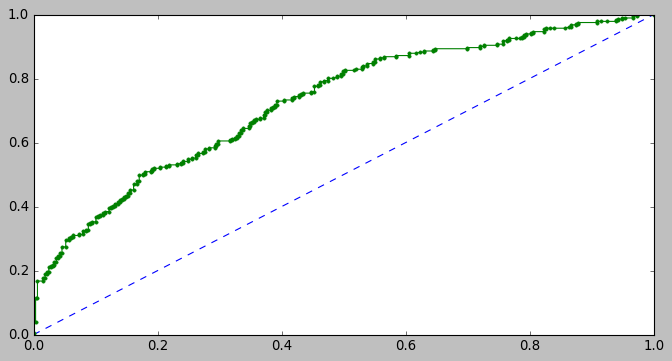

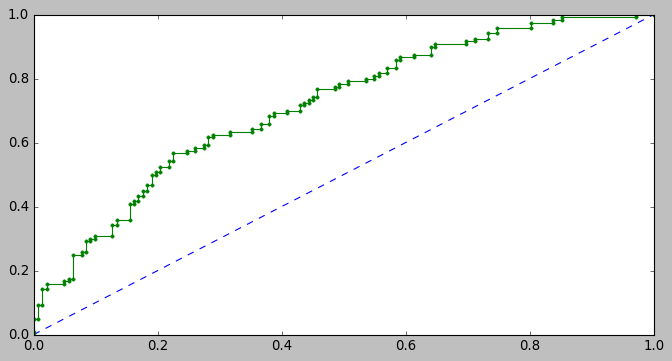

In [454]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')